# Topology Optimization

Import all the libraries and the code.

In [1]:
#from __future__ import division
import sys

### Imports for calculations
import numpy as np
from numpy.lib import scimath
import math

### Import for solver
import scipy
from scipy.sparse import diags 
from scipy.sparse import coo_matrix
from scipy.sparse.linalg import spsolve

### Imports for plots
from matplotlib import colors
import matplotlib.pyplot as plt

import Generalized_projection

Try the code by changing the number of elements in x and in y, the volume fraction, the method and the beam.

A maximum of iterations was added due to the long computational time.



Topology_optimization.main( nelx, nely, volfrac, settings, BC)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


Start iteration
it.: 1 , obj.: 647.567 Vol.: 0.227, kktnorm.: 10.001  ch.: 1.000
it.: 2 , obj.: 204.361 Vol.: 0.309, kktnorm.: 51.763  ch.: 0.070
it.: 3 , obj.: 146.799 Vol.: 0.344, kktnorm.: 27.527  ch.: 0.054
it.: 4 , obj.: 118.131 Vol.: 0.361, kktnorm.: 21.385  ch.: 0.054
it.: 5 , obj.: 102.668 Vol.: 0.388, kktnorm.: 12.849  ch.: 0.058
it.: 6 , obj.: 88.928 Vol.: 0.411, kktnorm.: 8.218  ch.: 0.056
it.: 7 , obj.: 89.353 Vol.: 0.391, kktnorm.: 4.958  ch.: 0.026
it.: 8 , obj.: 86.318 Vol.: 0.399, kktnorm.: 4.148  ch.: 0.017
it.: 9 , obj.: 85.334 Vol.: 0.399, kktnorm.: 2.287  ch.: 0.013
it.: 10 , obj.: 84.382 Vol.: 0.399, kktnorm.: 2.449  ch.: 0.015
it.: 11 , obj.: 83.653 Vol.: 0.400, kktnorm.: 2.500  ch.: 0.013
it.: 12 , obj.: 83.002 Vol.: 0.400, kktnorm.: 2.221  ch.: 0.012
it.: 13 , obj.: 82.419 Vol.: 0.400, kktnorm.: 1.969  ch.: 0.013
it.: 14 , obj.: 81.842 Vol.: 0.400, kktnorm.: 2.235  ch.: 0.017
it.: 15 , obj.: 81.284 Vol.: 0.400, kktnorm.: 1.360  ch.: 0.021
it.: 16 , obj.: 80.999 

it.: 129 , obj.: 73.198 Vol.: 0.400, kktnorm.: 0.198  ch.: 0.003
it.: 130 , obj.: 73.195 Vol.: 0.400, kktnorm.: 0.201  ch.: 0.003
it.: 131 , obj.: 73.192 Vol.: 0.400, kktnorm.: 0.201  ch.: 0.003
it.: 132 , obj.: 73.189 Vol.: 0.400, kktnorm.: 0.198  ch.: 0.003
it.: 133 , obj.: 73.185 Vol.: 0.400, kktnorm.: 0.190  ch.: 0.004
it.: 134 , obj.: 73.181 Vol.: 0.400, kktnorm.: 0.181  ch.: 0.004
it.: 135 , obj.: 73.176 Vol.: 0.400, kktnorm.: 0.178  ch.: 0.004
it.: 136 , obj.: 73.172 Vol.: 0.400, kktnorm.: 0.179  ch.: 0.004
it.: 137 , obj.: 73.166 Vol.: 0.400, kktnorm.: 0.152  ch.: 0.008
it.: 138 , obj.: 73.157 Vol.: 0.400, kktnorm.: 0.144  ch.: 0.005
it.: 139 , obj.: 73.154 Vol.: 0.400, kktnorm.: 0.111  ch.: 0.004
it.: 140 , obj.: 73.154 Vol.: 0.400, kktnorm.: 0.148  ch.: 0.004
it.: 141 , obj.: 73.150 Vol.: 0.400, kktnorm.: 0.219  ch.: 0.008
it.: 142 , obj.: 73.148 Vol.: 0.400, kktnorm.: 0.288  ch.: 0.005
it.: 143 , obj.: 73.145 Vol.: 0.400, kktnorm.: 0.105  ch.: 0.003
it.: 144 , obj.: 73.144 V

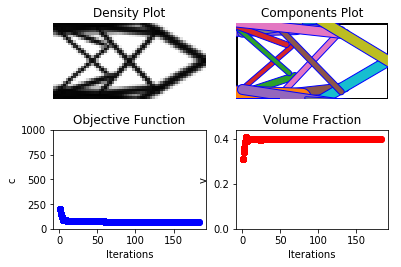

In [2]:
nelx = 60
nely = 30
volume_fraction = 0.4
method = 'GGP'        # 'GGP'   'MMC'
BC = 'Short_Cantiliever'       # 'MBB'   'Short_Cantiliever'   'L-Shape'   'Top_Rib'
max_iterations = 500

it, c, v, x, xn, yn, Mc, kktnorm = Generalized_projection.main(nelx,nely,volume_fraction,method,BC,max_iterations)

Density plot

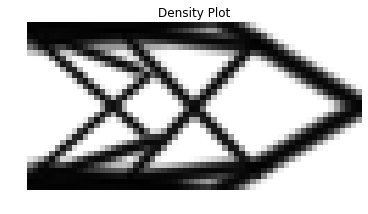

Plot Saved


In [3]:
fig=plt.figure()
plt.title('Density Plot')
plt.imshow(-x, cmap='gray', interpolation='none', norm=colors.Normalize(vmin=-1, vmax=0))
plt.axis('off')
plt.show()
fig.savefig('Density plot ' + str(nelx) + ' x '+ str(nely) + ' - ' + str(BC) + ' - ' + str(method) + ' - ' + str(volume_fraction) + '.png')     
print("Plot Saved" )

Components plot

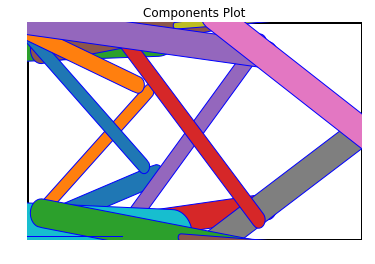

Plot Saved


In [4]:
fig=plt.figure()
plt.title('Components Plot')
plt.fill([0,nelx,nelx,0],[0,0,nely,nely],"w",edgecolor='black', linewidth=3)
plt.fill(xn,yn,Mc,"b",edgecolor='blue', linewidth=1)
if BC == 'L-shape':
    plt.fill([(nelx)/2,nelx,nelx,(nelx)/2],[(nely)/2,(nely)/2,nely,nely],"w",edgecolor='black', linewidth=3)
plt.axis([0,nelx,0,nely])
plt.axis('off')
plt.show()
fig.savefig('Component plot ' + str(nelx) + ' x '+ str(nely) + ' - ' + str(BC) + ' - ' + str(method) + ' - ' + str(volume_fraction) + '.png')     
print("Plot Saved" )

Check the graph of the objective function

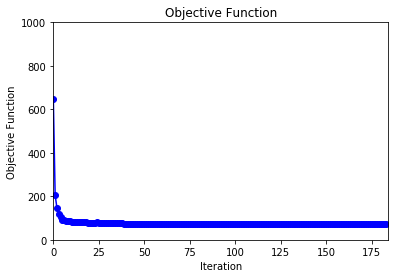

Plot Saved


In [5]:
fig=plt.figure()
plt.title('Objective Function')
x_plot = np.arange(0,it)
plt.plot(x_plot,c[x_plot],'b', marker = 'o')
plt.xlabel('Iteration')
plt.ylabel('Objective Function')
plt.axis([0,it,0,1000])
plt.show()
fig.savefig('Objective Function ' + str(nelx) + ' x '+ str(nely) + ' - ' + str(BC) + ' - ' + str(method) + ' - ' + str(volume_fraction) + '.png')     
print("Plot Saved" )

Check the graph of the volume fraction

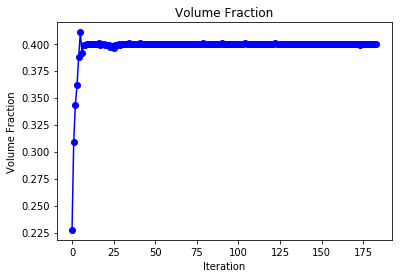

Plot Saved


In [6]:
fig=plt.figure()
plt.title('Volume Fraction')
x_plot = np.arange(0,it)
plt.plot(x_plot,v[x_plot],'b', marker = 'o')
plt.xlabel('Iteration')
plt.ylabel('Volume Fraction')
plt.show()
fig.savefig('Volume Fraction ' + str(nelx) + ' x '+ str(nely) + ' - ' + str(BC) + ' - ' + str(method) + ' - ' + str(volume_fraction) + '.png')     
print("Plot Saved" )

kktnorm plot

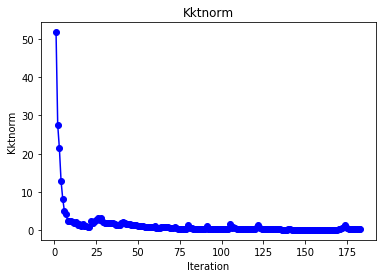

Plot Saved


In [7]:
fig=plt.figure()
plt.title('Kktnorm')
x_plot = np.arange(1,it)
plt.plot(x_plot,kktnorm[x_plot],'b', marker = 'o')
plt.xlabel('Iteration')
plt.ylabel('Kktnorm')
plt.show()
fig.savefig('Kktnorm ' + str(nelx) + ' x '+ str(nely) + ' - ' + str(BC) + ' - ' + str(method) + ' - ' + str(volume_fraction) + '.png')     
print("Plot Saved" )

###  Diferent Types of Test Beams

Different types of beams: MBB, Short Cantiliever, L-Shape and Top_Rib

First let's see the MBB

Start iteration
it.: 1 , obj.: 10848.539 Vol.: 0.046, kktnorm.: 10.001  ch.: 1.000
it.: 2 , obj.: 4174.175 Vol.: 0.131, kktnorm.: 96.577  ch.: 0.070
it.: 3 , obj.: 1335.275 Vol.: 0.202, kktnorm.: 75.865  ch.: 0.068
it.: 4 , obj.: 556.462 Vol.: 0.267, kktnorm.: 67.030  ch.: 0.068
it.: 5 , obj.: 247.672 Vol.: 0.317, kktnorm.: 75.951  ch.: 0.063
it.: 6 , obj.: 192.641 Vol.: 0.361, kktnorm.: 23.960  ch.: 0.054
it.: 7 , obj.: 174.832 Vol.: 0.379, kktnorm.: 15.765  ch.: 0.043
it.: 8 , obj.: 166.138 Vol.: 0.375, kktnorm.: 14.010  ch.: 0.044
it.: 9 , obj.: 144.935 Vol.: 0.389, kktnorm.: 10.235  ch.: 0.044
it.: 10 , obj.: 135.319 Vol.: 0.393, kktnorm.: 6.050  ch.: 0.034
it.: 11 , obj.: 131.141 Vol.: 0.397, kktnorm.: 4.375  ch.: 0.048
it.: 12 , obj.: 134.937 Vol.: 0.397, kktnorm.: 4.715  ch.: 0.075
it.: 13 , obj.: 128.901 Vol.: 0.398, kktnorm.: 6.600  ch.: 0.034
it.: 14 , obj.: 125.530 Vol.: 0.399, kktnorm.: 4.941  ch.: 0.035
it.: 15 , obj.: 123.097 Vol.: 0.399, kktnorm.: 3.953  ch.: 0.036
it.: 

it.: 128 , obj.: 94.822 Vol.: 0.400, kktnorm.: 0.138  ch.: 0.075
it.: 129 , obj.: 94.771 Vol.: 0.400, kktnorm.: 0.104  ch.: 0.089
it.: 130 , obj.: 94.729 Vol.: 0.400, kktnorm.: 0.124  ch.: 0.043
it.: 131 , obj.: 94.730 Vol.: 0.400, kktnorm.: 0.112  ch.: 0.014
it.: 132 , obj.: 94.725 Vol.: 0.400, kktnorm.: 0.131  ch.: 0.014
it.: 133 , obj.: 94.725 Vol.: 0.400, kktnorm.: 0.119  ch.: 0.005
it.: 134 , obj.: 94.722 Vol.: 0.400, kktnorm.: 0.117  ch.: 0.002
it.: 135 , obj.: 94.720 Vol.: 0.400, kktnorm.: 0.105  ch.: 0.002
it.: 136 , obj.: 94.718 Vol.: 0.400, kktnorm.: 0.100  ch.: 0.002
it.: 137 , obj.: 94.716 Vol.: 0.400, kktnorm.: 0.091  ch.: 0.002
it.: 138 , obj.: 94.714 Vol.: 0.400, kktnorm.: 0.090  ch.: 0.002
it.: 139 , obj.: 94.711 Vol.: 0.400, kktnorm.: 0.075  ch.: 0.003
it.: 140 , obj.: 94.710 Vol.: 0.400, kktnorm.: 0.099  ch.: 0.003
it.: 141 , obj.: 94.709 Vol.: 0.400, kktnorm.: 0.069  ch.: 0.003
it.: 142 , obj.: 94.709 Vol.: 0.400, kktnorm.: 0.287  ch.: 0.013
it.: 143 , obj.: 94.704 V

it.: 255 , obj.: 94.632 Vol.: 0.400, kktnorm.: 0.036  ch.: 0.001
it.: 256 , obj.: 94.632 Vol.: 0.400, kktnorm.: 0.037  ch.: 0.001
it.: 257 , obj.: 94.632 Vol.: 0.400, kktnorm.: 0.034  ch.: 0.001
it.: 258 , obj.: 94.631 Vol.: 0.400, kktnorm.: 0.039  ch.: 0.001
it.: 259 , obj.: 94.631 Vol.: 0.400, kktnorm.: 0.036  ch.: 0.002
it.: 260 , obj.: 94.632 Vol.: 0.400, kktnorm.: 0.104  ch.: 0.002
it.: 261 , obj.: 94.631 Vol.: 0.400, kktnorm.: 0.117  ch.: 0.002
it.: 262 , obj.: 94.631 Vol.: 0.400, kktnorm.: 0.078  ch.: 0.002
it.: 263 , obj.: 94.630 Vol.: 0.400, kktnorm.: 0.037  ch.: 0.002
it.: 264 , obj.: 94.631 Vol.: 0.400, kktnorm.: 0.040  ch.: 0.002
it.: 265 , obj.: 94.631 Vol.: 0.400, kktnorm.: 0.033  ch.: 0.003
it.: 266 , obj.: 94.629 Vol.: 0.400, kktnorm.: 0.029  ch.: 0.020
it.: 267 , obj.: 94.631 Vol.: 0.400, kktnorm.: 0.029  ch.: 0.005
it.: 268 , obj.: 94.630 Vol.: 0.400, kktnorm.: 0.028  ch.: 0.001
it.: 269 , obj.: 94.630 Vol.: 0.400, kktnorm.: 0.027  ch.: 0.001
it.: 270 , obj.: 94.630 V

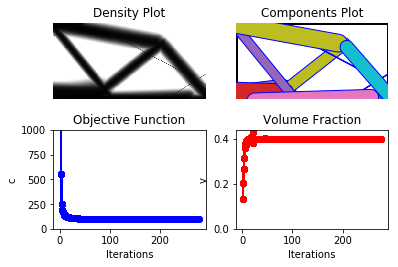

In [8]:
#'MBB'
it, c, v, x, xn, yn, Mc, kktnorm = Generalized_projection.main(320,160,volume_fraction,method,'MBB',max_iterations)

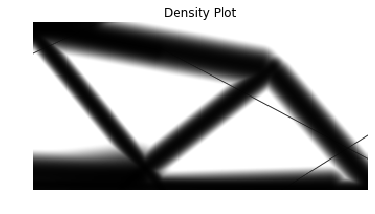

Plot Saved


In [9]:
fig=plt.figure()
plt.title('Density Plot')
plt.imshow(-x, cmap='gray', interpolation='none', norm=colors.Normalize(vmin=-1, vmax=0))
plt.axis('off')
plt.show()
fig.savefig('Density plot ' + '320' + ' x '+ '160' + ' - MBB - ' + str(method) + ' - ' + str(volume_fraction) + '.png')     
print("Plot Saved" )

Short Cantiliever

Start iteration
it.: 1 , obj.: 4159.871 Vol.: 0.046, kktnorm.: 10.001  ch.: 1.000
it.: 2 , obj.: 1152.187 Vol.: 0.128, kktnorm.: 96.384  ch.: 0.069
it.: 3 , obj.: 602.295 Vol.: 0.197, kktnorm.: 76.292  ch.: 0.064
it.: 4 , obj.: 209.342 Vol.: 0.253, kktnorm.: 63.811  ch.: 0.061
it.: 5 , obj.: 297.456 Vol.: 0.288, kktnorm.: 42.387  ch.: 0.059
it.: 6 , obj.: 128.217 Vol.: 0.326, kktnorm.: 66.680  ch.: 0.052
it.: 7 , obj.: 110.688 Vol.: 0.360, kktnorm.: 21.164  ch.: 0.043
it.: 8 , obj.: 96.568 Vol.: 0.391, kktnorm.: 15.191  ch.: 0.031
it.: 9 , obj.: 92.441 Vol.: 0.397, kktnorm.: 7.283  ch.: 0.027
it.: 10 , obj.: 90.156 Vol.: 0.398, kktnorm.: 6.103  ch.: 0.021
it.: 11 , obj.: 88.326 Vol.: 0.398, kktnorm.: 4.930  ch.: 0.024
it.: 12 , obj.: 86.689 Vol.: 0.398, kktnorm.: 3.521  ch.: 0.028
it.: 13 , obj.: 85.258 Vol.: 0.398, kktnorm.: 2.830  ch.: 0.034
it.: 14 , obj.: 83.983 Vol.: 0.398, kktnorm.: 2.486  ch.: 0.040
it.: 15 , obj.: 82.855 Vol.: 0.398, kktnorm.: 2.201  ch.: 0.040
it.: 16 , obj.: 

it.: 129 , obj.: 76.464 Vol.: 0.400, kktnorm.: 0.080  ch.: 0.008
it.: 130 , obj.: 76.455 Vol.: 0.400, kktnorm.: 0.128  ch.: 0.007
it.: 131 , obj.: 76.451 Vol.: 0.400, kktnorm.: 0.098  ch.: 0.011
it.: 132 , obj.: 76.445 Vol.: 0.400, kktnorm.: 0.101  ch.: 0.009
it.: 133 , obj.: 76.442 Vol.: 0.400, kktnorm.: 0.323  ch.: 0.005
it.: 134 , obj.: 76.435 Vol.: 0.400, kktnorm.: 0.180  ch.: 0.005
it.: 135 , obj.: 76.431 Vol.: 0.400, kktnorm.: 0.207  ch.: 0.003
it.: 136 , obj.: 76.426 Vol.: 0.400, kktnorm.: 0.101  ch.: 0.005
it.: 137 , obj.: 76.422 Vol.: 0.400, kktnorm.: 0.097  ch.: 0.005
it.: 138 , obj.: 76.420 Vol.: 0.400, kktnorm.: 0.080  ch.: 0.005
it.: 139 , obj.: 76.417 Vol.: 0.400, kktnorm.: 0.076  ch.: 0.004
it.: 140 , obj.: 76.413 Vol.: 0.400, kktnorm.: 0.105  ch.: 0.005
it.: 141 , obj.: 76.410 Vol.: 0.400, kktnorm.: 0.079  ch.: 0.006
it.: 142 , obj.: 76.407 Vol.: 0.400, kktnorm.: 0.067  ch.: 0.005
it.: 143 , obj.: 76.400 Vol.: 0.400, kktnorm.: 0.084  ch.: 0.004
it.: 144 , obj.: 76.396 V

it.: 256 , obj.: 76.044 Vol.: 0.400, kktnorm.: 0.077  ch.: 0.002
it.: 257 , obj.: 76.042 Vol.: 0.400, kktnorm.: 0.073  ch.: 0.002
it.: 258 , obj.: 76.039 Vol.: 0.400, kktnorm.: 0.065  ch.: 0.002
it.: 259 , obj.: 76.036 Vol.: 0.400, kktnorm.: 0.060  ch.: 0.002
it.: 260 , obj.: 76.034 Vol.: 0.400, kktnorm.: 0.053  ch.: 0.002
it.: 261 , obj.: 76.031 Vol.: 0.400, kktnorm.: 0.075  ch.: 0.002
it.: 262 , obj.: 76.030 Vol.: 0.400, kktnorm.: 0.055  ch.: 0.002
it.: 263 , obj.: 76.027 Vol.: 0.400, kktnorm.: 0.098  ch.: 0.002
it.: 264 , obj.: 76.024 Vol.: 0.400, kktnorm.: 0.059  ch.: 0.001
it.: 265 , obj.: 76.022 Vol.: 0.400, kktnorm.: 0.054  ch.: 0.001
it.: 266 , obj.: 76.019 Vol.: 0.400, kktnorm.: 0.046  ch.: 0.001
it.: 267 , obj.: 76.017 Vol.: 0.400, kktnorm.: 0.042  ch.: 0.001
it.: 268 , obj.: 76.015 Vol.: 0.400, kktnorm.: 0.040  ch.: 0.002
it.: 269 , obj.: 76.014 Vol.: 0.400, kktnorm.: 0.039  ch.: 0.002
it.: 270 , obj.: 76.016 Vol.: 0.400, kktnorm.: 0.092  ch.: 0.005
it.: 271 , obj.: 76.031 V

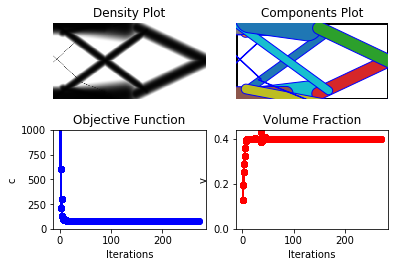

In [10]:
#'Short_Cantiliever'
it, c, v, x, xn, yn, Mc, kktnorm = Generalized_projection.main(320,160,volume_fraction,method,'Short_Cantiliever',max_iterations)

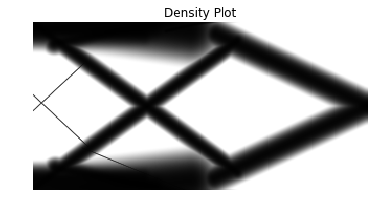

In [11]:
fig=plt.figure()
plt.title('Density Plot')
plt.imshow(-x, cmap='gray', interpolation='none', norm=colors.Normalize(vmin=-1, vmax=0))
plt.axis('off')
plt.show()
fig.savefig('Density plot ' + '320' + ' x '+ '160' + ' - Short_Cantiliever - ' + str(method) + ' - ' + str(volume_fraction) + '.png')     

L-Shape

Start iteration
it.: 1 , obj.: 31016.943 Vol.: 0.034, kktnorm.: 10.001  ch.: 1.000
it.: 2 , obj.: 9771.006 Vol.: 0.088, kktnorm.: 86.315  ch.: 0.058
it.: 3 , obj.: 3442.423 Vol.: 0.122, kktnorm.: 72.409  ch.: 0.052
it.: 4 , obj.: 1569.313 Vol.: 0.147, kktnorm.: 56.782  ch.: 0.050
it.: 5 , obj.: 986.745 Vol.: 0.173, kktnorm.: 38.828  ch.: 0.045
it.: 6 , obj.: 918.296 Vol.: 0.181, kktnorm.: 184.659  ch.: 0.035
it.: 7 , obj.: 637.419 Vol.: 0.173, kktnorm.: 164.337  ch.: 0.038
it.: 8 , obj.: 811.238 Vol.: 0.184, kktnorm.: 32.981  ch.: 0.032
it.: 9 , obj.: 518.718 Vol.: 0.181, kktnorm.: 26.491  ch.: 0.032
it.: 10 , obj.: 392.352 Vol.: 0.187, kktnorm.: 288.979  ch.: 0.016
it.: 11 , obj.: 365.365 Vol.: 0.194, kktnorm.: 30.271  ch.: 0.021
it.: 12 , obj.: 342.855 Vol.: 0.195, kktnorm.: 21.089  ch.: 0.015
it.: 13 , obj.: 308.675 Vol.: 0.218, kktnorm.: 18.625  ch.: 0.020
it.: 14 , obj.: 316.526 Vol.: 0.199, kktnorm.: 19.142  ch.: 0.019
it.: 15 , obj.: 298.273 Vol.: 0.201, kktnorm.: 13.005  ch.: 0

it.: 126 , obj.: 162.143 Vol.: 0.200, kktnorm.: 1.569  ch.: 0.005
it.: 127 , obj.: 162.084 Vol.: 0.200, kktnorm.: 1.557  ch.: 0.005
it.: 128 , obj.: 162.017 Vol.: 0.200, kktnorm.: 1.489  ch.: 0.005
it.: 129 , obj.: 161.942 Vol.: 0.200, kktnorm.: 1.422  ch.: 0.005
it.: 130 , obj.: 161.859 Vol.: 0.200, kktnorm.: 1.321  ch.: 0.005
it.: 131 , obj.: 161.768 Vol.: 0.200, kktnorm.: 1.243  ch.: 0.005
it.: 132 , obj.: 161.669 Vol.: 0.200, kktnorm.: 1.092  ch.: 0.005
it.: 133 , obj.: 161.875 Vol.: 0.200, kktnorm.: 1.339  ch.: 0.006
it.: 134 , obj.: 161.881 Vol.: 0.200, kktnorm.: 2.771  ch.: 0.039
it.: 135 , obj.: 161.741 Vol.: 0.200, kktnorm.: 1.904  ch.: 0.005
it.: 136 , obj.: 161.648 Vol.: 0.200, kktnorm.: 1.391  ch.: 0.004
it.: 137 , obj.: 161.616 Vol.: 0.200, kktnorm.: 1.224  ch.: 0.003
it.: 138 , obj.: 161.581 Vol.: 0.200, kktnorm.: 1.190  ch.: 0.003
it.: 139 , obj.: 161.543 Vol.: 0.200, kktnorm.: 1.171  ch.: 0.003
it.: 140 , obj.: 161.499 Vol.: 0.200, kktnorm.: 1.138  ch.: 0.004
it.: 141 ,

it.: 251 , obj.: 157.463 Vol.: 0.200, kktnorm.: 0.402  ch.: 0.002
it.: 252 , obj.: 157.449 Vol.: 0.200, kktnorm.: 0.281  ch.: 0.003
it.: 253 , obj.: 157.432 Vol.: 0.200, kktnorm.: 0.391  ch.: 0.002
it.: 254 , obj.: 157.412 Vol.: 0.200, kktnorm.: 0.297  ch.: 0.003
it.: 255 , obj.: 157.388 Vol.: 0.200, kktnorm.: 0.299  ch.: 0.043
it.: 256 , obj.: 157.376 Vol.: 0.200, kktnorm.: 0.287  ch.: 0.004
it.: 257 , obj.: 157.351 Vol.: 0.200, kktnorm.: 0.559  ch.: 0.005
it.: 258 , obj.: 157.394 Vol.: 0.200, kktnorm.: 0.653  ch.: 0.006
it.: 259 , obj.: 157.345 Vol.: 0.200, kktnorm.: 1.257  ch.: 0.005
it.: 260 , obj.: 157.319 Vol.: 0.200, kktnorm.: 0.704  ch.: 0.002
it.: 261 , obj.: 157.306 Vol.: 0.200, kktnorm.: 0.536  ch.: 0.003
it.: 262 , obj.: 157.293 Vol.: 0.200, kktnorm.: 0.490  ch.: 0.002
it.: 263 , obj.: 157.282 Vol.: 0.200, kktnorm.: 0.479  ch.: 0.002
it.: 264 , obj.: 157.273 Vol.: 0.200, kktnorm.: 0.314  ch.: 0.002
it.: 265 , obj.: 157.267 Vol.: 0.200, kktnorm.: 0.468  ch.: 0.002
it.: 266 ,

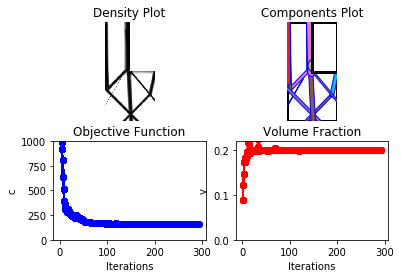

In [12]:
#'L-Shape'
it, c, v, x, xn, yn, Mc, kktnorm = Generalized_projection.main(160,320,0.2,method,'L-Shape',max_iterations)

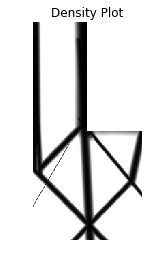

Plot Saved


In [13]:
fig=plt.figure()
plt.title('Density Plot')
plt.imshow(-x, cmap='gray', interpolation='none', norm=colors.Normalize(vmin=-1, vmax=0))
plt.axis('off')
plt.show()
fig.savefig('Density plot ' + '160' + ' x '+ '320' + ' - L-Shape - ' + str(method) + ' - ' + '0.2' + '.png')     
print("Plot Saved" )

Top Rib with the MNA method

Start iteration
it.: 1 , obj.: 195899329.400 Vol.: 0.148, kktnorm.: 10.001  ch.: 1.000
it.: 2 , obj.: 177284459.737 Vol.: 0.165, kktnorm.: 13.922  ch.: 0.101
it.: 3 , obj.: 151819515.544 Vol.: 0.182, kktnorm.: 18.802  ch.: 0.112
it.: 4 , obj.: 120084443.928 Vol.: 0.203, kktnorm.: 25.380  ch.: 0.142
it.: 5 , obj.: 81174754.528 Vol.: 0.231, kktnorm.: 35.328  ch.: 0.172
it.: 6 , obj.: 49017806.646 Vol.: 0.263, kktnorm.: 42.329  ch.: 0.227
it.: 7 , obj.: 25100978.682 Vol.: 0.295, kktnorm.: 34.537  ch.: 0.240
it.: 8 , obj.: 12369483.121 Vol.: 0.326, kktnorm.: 27.604  ch.: 0.233
it.: 9 , obj.: 6512795.095 Vol.: 0.351, kktnorm.: 23.974  ch.: 0.234
it.: 10 , obj.: 4554200.407 Vol.: 0.368, kktnorm.: 15.371  ch.: 0.236
it.: 11 , obj.: 1093049.330 Vol.: 0.376, kktnorm.: 29.096  ch.: 0.223
it.: 12 , obj.: 847739.226 Vol.: 0.391, kktnorm.: 6.556  ch.: 0.223
it.: 13 , obj.: 756368.517 Vol.: 0.394, kktnorm.: 2.648  ch.: 0.203
it.: 14 , obj.: 706749.470 Vol.: 0.396, kktnorm.: 1.783  ch.: 0.212
it.: 15

it.: 121 , obj.: 592473.203 Vol.: 0.400, kktnorm.: 0.020  ch.: 0.020
it.: 122 , obj.: 592472.791 Vol.: 0.400, kktnorm.: 0.022  ch.: 0.023
it.: 123 , obj.: 592476.579 Vol.: 0.399, kktnorm.: 0.015  ch.: 0.012
it.: 124 , obj.: 592474.532 Vol.: 0.398, kktnorm.: 0.134  ch.: 0.018
it.: 125 , obj.: 592472.662 Vol.: 0.400, kktnorm.: 0.412  ch.: 0.009
it.: 126 , obj.: 592472.362 Vol.: 0.400, kktnorm.: 0.023  ch.: 0.007
it.: 127 , obj.: 592472.105 Vol.: 0.400, kktnorm.: 0.036  ch.: 0.004
it.: 128 , obj.: 592471.973 Vol.: 0.400, kktnorm.: 0.013  ch.: 0.006
it.: 129 , obj.: 592471.870 Vol.: 0.400, kktnorm.: 0.009  ch.: 0.005
it.: 130 , obj.: 592471.781 Vol.: 0.400, kktnorm.: 0.006  ch.: 0.006
it.: 131 , obj.: 592471.699 Vol.: 0.400, kktnorm.: 0.005  ch.: 0.004
it.: 132 , obj.: 592471.610 Vol.: 0.400, kktnorm.: 0.005  ch.: 0.005
it.: 133 , obj.: 592471.512 Vol.: 0.400, kktnorm.: 0.005  ch.: 0.006
it.: 134 , obj.: 592471.386 Vol.: 0.400, kktnorm.: 0.005  ch.: 0.008
it.: 135 , obj.: 592471.315 Vol.: 

it.: 240 , obj.: 592467.751 Vol.: 0.400, kktnorm.: 0.005  ch.: 0.005
it.: 241 , obj.: 592467.511 Vol.: 0.400, kktnorm.: 0.006  ch.: 0.005
it.: 242 , obj.: 592467.254 Vol.: 0.400, kktnorm.: 0.011  ch.: 0.007
it.: 243 , obj.: 592467.151 Vol.: 0.400, kktnorm.: 0.023  ch.: 0.009
it.: 244 , obj.: 592467.114 Vol.: 0.400, kktnorm.: 0.006  ch.: 0.007
it.: 245 , obj.: 592467.093 Vol.: 0.400, kktnorm.: 0.005  ch.: 0.004
it.: 246 , obj.: 592467.081 Vol.: 0.400, kktnorm.: 0.004  ch.: 0.003
it.: 247 , obj.: 592467.067 Vol.: 0.400, kktnorm.: 0.004  ch.: 0.004
it.: 248 , obj.: 592467.051 Vol.: 0.400, kktnorm.: 0.004  ch.: 0.004
it.: 249 , obj.: 592467.037 Vol.: 0.400, kktnorm.: 0.004  ch.: 0.004
it.: 250 , obj.: 592467.023 Vol.: 0.400, kktnorm.: 0.004  ch.: 0.004
it.: 251 , obj.: 592467.008 Vol.: 0.400, kktnorm.: 0.004  ch.: 0.004
it.: 252 , obj.: 592466.996 Vol.: 0.400, kktnorm.: 0.004  ch.: 0.004
it.: 253 , obj.: 592466.986 Vol.: 0.400, kktnorm.: 0.003  ch.: 0.003
it.: 254 , obj.: 592466.976 Vol.: 

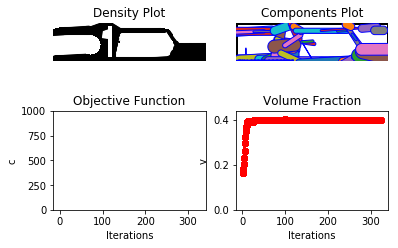

In [14]:
#'Top_Rib'
it, c, v, x, xn, yn, Mc, kktnorm = Generalized_projection.main(160,40,volume_fraction,'MNA','Top_Rib',max_iterations)

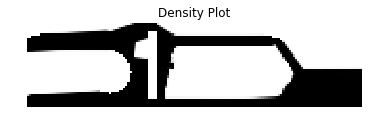

Plot Saved


In [15]:
fig=plt.figure()
plt.title('Density Plot')
plt.imshow(-x, cmap='gray', interpolation='none', norm=colors.Normalize(vmin=-1, vmax=0))
plt.axis('off')
plt.show()
fig.savefig('Density plot ' + '160' + ' x '+ '40' + ' - Top_Rib - ' + 'MNA' + ' - ' + str(volume_fraction) + '.png')     
print("Plot Saved" )

### Different Methods

Now let's try different approaches: GGP, MMC, MNA and GP 

First the Generalized Geometry Projection (GGP)

Start iteration
it.: 1 , obj.: 647.567 Vol.: 0.227, kktnorm.: 10.001  ch.: 1.000
it.: 2 , obj.: 204.361 Vol.: 0.309, kktnorm.: 51.763  ch.: 0.070
it.: 3 , obj.: 146.799 Vol.: 0.344, kktnorm.: 27.527  ch.: 0.054
it.: 4 , obj.: 118.131 Vol.: 0.361, kktnorm.: 21.385  ch.: 0.054
it.: 5 , obj.: 102.668 Vol.: 0.388, kktnorm.: 12.849  ch.: 0.058
it.: 6 , obj.: 88.928 Vol.: 0.411, kktnorm.: 8.218  ch.: 0.056
it.: 7 , obj.: 89.353 Vol.: 0.391, kktnorm.: 4.958  ch.: 0.026
it.: 8 , obj.: 86.318 Vol.: 0.399, kktnorm.: 4.148  ch.: 0.017
it.: 9 , obj.: 85.334 Vol.: 0.399, kktnorm.: 2.287  ch.: 0.013
it.: 10 , obj.: 84.382 Vol.: 0.399, kktnorm.: 2.449  ch.: 0.015
it.: 11 , obj.: 83.653 Vol.: 0.400, kktnorm.: 2.500  ch.: 0.013
it.: 12 , obj.: 83.002 Vol.: 0.400, kktnorm.: 2.221  ch.: 0.012
it.: 13 , obj.: 82.419 Vol.: 0.400, kktnorm.: 1.969  ch.: 0.013
it.: 14 , obj.: 81.842 Vol.: 0.400, kktnorm.: 2.235  ch.: 0.017
it.: 15 , obj.: 81.284 Vol.: 0.400, kktnorm.: 1.360  ch.: 0.021
it.: 16 , obj.: 80.999 

it.: 129 , obj.: 73.198 Vol.: 0.400, kktnorm.: 0.198  ch.: 0.003
it.: 130 , obj.: 73.195 Vol.: 0.400, kktnorm.: 0.201  ch.: 0.003
it.: 131 , obj.: 73.192 Vol.: 0.400, kktnorm.: 0.201  ch.: 0.003
it.: 132 , obj.: 73.189 Vol.: 0.400, kktnorm.: 0.198  ch.: 0.003
it.: 133 , obj.: 73.185 Vol.: 0.400, kktnorm.: 0.190  ch.: 0.004
it.: 134 , obj.: 73.181 Vol.: 0.400, kktnorm.: 0.181  ch.: 0.004
it.: 135 , obj.: 73.176 Vol.: 0.400, kktnorm.: 0.178  ch.: 0.004
it.: 136 , obj.: 73.172 Vol.: 0.400, kktnorm.: 0.179  ch.: 0.004
it.: 137 , obj.: 73.166 Vol.: 0.400, kktnorm.: 0.152  ch.: 0.008
it.: 138 , obj.: 73.157 Vol.: 0.400, kktnorm.: 0.144  ch.: 0.005
it.: 139 , obj.: 73.154 Vol.: 0.400, kktnorm.: 0.111  ch.: 0.004
it.: 140 , obj.: 73.154 Vol.: 0.400, kktnorm.: 0.148  ch.: 0.004
it.: 141 , obj.: 73.150 Vol.: 0.400, kktnorm.: 0.219  ch.: 0.008
it.: 142 , obj.: 73.148 Vol.: 0.400, kktnorm.: 0.288  ch.: 0.005
it.: 143 , obj.: 73.145 Vol.: 0.400, kktnorm.: 0.105  ch.: 0.003
it.: 144 , obj.: 73.144 V

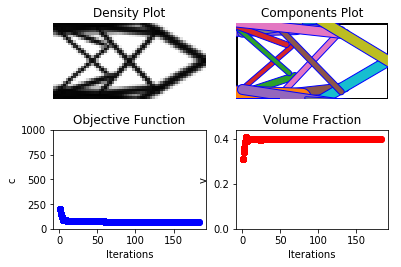

In [16]:
# 'GGP'
it, c, v, x, xn, yn, Mc, kktnorm = Generalized_projection.main(nelx,nely,volume_fraction,'GGP',BC,max_iterations)

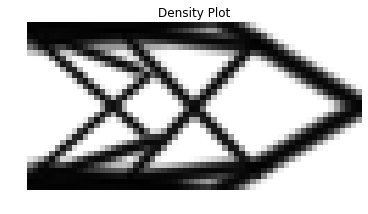

Plot Saved


In [17]:
fig=plt.figure()
plt.title('Density Plot')
plt.imshow(-x, cmap='gray', interpolation='none', norm=colors.Normalize(vmin=-1, vmax=0))
plt.axis('off')
plt.show()
fig.savefig('Density plot ' + str(nelx) + ' x '+ str(nely) + ' - ' + str(BC) + ' - GGP - ' + str(volume_fraction) + '.png')     
print("Plot Saved" )

Moving Morphable Components (MMC)

Start iteration
it.: 1 , obj.: 647.567 Vol.: 0.227, kktnorm.: 10.001  ch.: 1.000
it.: 2 , obj.: 204.361 Vol.: 0.309, kktnorm.: 51.763  ch.: 0.070
it.: 3 , obj.: 146.799 Vol.: 0.344, kktnorm.: 27.527  ch.: 0.054
it.: 4 , obj.: 118.131 Vol.: 0.361, kktnorm.: 21.385  ch.: 0.054
it.: 5 , obj.: 102.668 Vol.: 0.388, kktnorm.: 12.849  ch.: 0.058
it.: 6 , obj.: 88.928 Vol.: 0.411, kktnorm.: 8.218  ch.: 0.056
it.: 7 , obj.: 89.353 Vol.: 0.391, kktnorm.: 4.958  ch.: 0.026
it.: 8 , obj.: 86.318 Vol.: 0.399, kktnorm.: 4.148  ch.: 0.017
it.: 9 , obj.: 85.334 Vol.: 0.399, kktnorm.: 2.287  ch.: 0.013
it.: 10 , obj.: 84.382 Vol.: 0.399, kktnorm.: 2.449  ch.: 0.015
it.: 11 , obj.: 83.653 Vol.: 0.400, kktnorm.: 2.500  ch.: 0.013
it.: 12 , obj.: 83.002 Vol.: 0.400, kktnorm.: 2.221  ch.: 0.012
it.: 13 , obj.: 82.419 Vol.: 0.400, kktnorm.: 1.969  ch.: 0.013
it.: 14 , obj.: 81.842 Vol.: 0.400, kktnorm.: 2.235  ch.: 0.017
it.: 15 , obj.: 81.284 Vol.: 0.400, kktnorm.: 1.360  ch.: 0.021
it.: 16 , obj.: 80.999 

it.: 129 , obj.: 73.198 Vol.: 0.400, kktnorm.: 0.198  ch.: 0.003
it.: 130 , obj.: 73.195 Vol.: 0.400, kktnorm.: 0.201  ch.: 0.003
it.: 131 , obj.: 73.192 Vol.: 0.400, kktnorm.: 0.201  ch.: 0.003
it.: 132 , obj.: 73.189 Vol.: 0.400, kktnorm.: 0.198  ch.: 0.003
it.: 133 , obj.: 73.185 Vol.: 0.400, kktnorm.: 0.190  ch.: 0.004
it.: 134 , obj.: 73.181 Vol.: 0.400, kktnorm.: 0.181  ch.: 0.004
it.: 135 , obj.: 73.176 Vol.: 0.400, kktnorm.: 0.178  ch.: 0.004
it.: 136 , obj.: 73.172 Vol.: 0.400, kktnorm.: 0.179  ch.: 0.004
it.: 137 , obj.: 73.166 Vol.: 0.400, kktnorm.: 0.152  ch.: 0.008
it.: 138 , obj.: 73.157 Vol.: 0.400, kktnorm.: 0.144  ch.: 0.005
it.: 139 , obj.: 73.154 Vol.: 0.400, kktnorm.: 0.111  ch.: 0.004
it.: 140 , obj.: 73.154 Vol.: 0.400, kktnorm.: 0.148  ch.: 0.004
it.: 141 , obj.: 73.150 Vol.: 0.400, kktnorm.: 0.219  ch.: 0.008
it.: 142 , obj.: 73.148 Vol.: 0.400, kktnorm.: 0.288  ch.: 0.005
it.: 143 , obj.: 73.145 Vol.: 0.400, kktnorm.: 0.105  ch.: 0.003
it.: 144 , obj.: 73.144 V

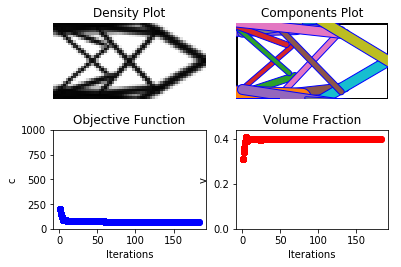

In [18]:
#'MMC'
it, c, v, x, xn, yn, Mc, kktnorm = Generalized_projection.main(nelx,nely,volume_fraction,'MMC',BC,max_iterations)

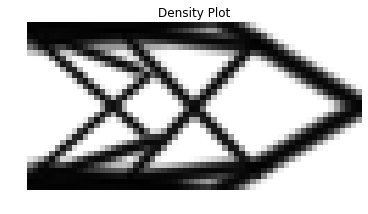

In [19]:
fig=plt.figure()
plt.title('Density Plot')
plt.imshow(-x, cmap='gray', interpolation='none', norm=colors.Normalize(vmin=-1, vmax=0))
plt.axis('off')
plt.show()
fig.savefig('Density plot ' + str(nelx) + ' x '+ str(nely) + ' - ' + str(BC) + ' - MMC - ' + str(volume_fraction) + '.png')     

Moving Nodes Approach (MNA)

Start iteration
it.: 1 , obj.: 24081932.148 Vol.: 0.075, kktnorm.: 10.001  ch.: 1.000
it.: 2 , obj.: 14765372.139 Vol.: 0.113, kktnorm.: 64.874  ch.: 0.078
it.: 3 , obj.: 8550807.782 Vol.: 0.155, kktnorm.: 72.645  ch.: 0.084
it.: 4 , obj.: 3074373.077 Vol.: 0.186, kktnorm.: 63.813  ch.: 0.091
it.: 5 , obj.: 1526806.400 Vol.: 0.236, kktnorm.: 55.237  ch.: 0.104
it.: 6 , obj.: 710517.298 Vol.: 0.286, kktnorm.: 43.711  ch.: 0.104
it.: 7 , obj.: 306370.132 Vol.: 0.335, kktnorm.: 31.601  ch.: 0.095
it.: 8 , obj.: 147413.576 Vol.: 0.369, kktnorm.: 19.249  ch.: 0.086
it.: 9 , obj.: 88240.901 Vol.: 0.400, kktnorm.: 13.634  ch.: 0.082
it.: 10 , obj.: 71992.778 Vol.: 0.394, kktnorm.: 10.734  ch.: 0.094
it.: 11 , obj.: 53301.340 Vol.: 0.396, kktnorm.: 15.649  ch.: 0.074
it.: 12 , obj.: 40218.689 Vol.: 0.396, kktnorm.: 19.336  ch.: 0.058
it.: 13 , obj.: 29651.597 Vol.: 0.394, kktnorm.: 15.610  ch.: 0.061
it.: 14 , obj.: 20022.215 Vol.: 0.393, kktnorm.: 18.245  ch.: 0.080
it.: 15 , obj.: 12508.777 

it.: 128 , obj.: 84.088 Vol.: 0.400, kktnorm.: 0.254  ch.: 0.001
it.: 129 , obj.: 84.085 Vol.: 0.400, kktnorm.: 0.240  ch.: 0.001
it.: 130 , obj.: 84.083 Vol.: 0.400, kktnorm.: 0.230  ch.: 0.001
it.: 131 , obj.: 84.080 Vol.: 0.400, kktnorm.: 0.231  ch.: 0.001
it.: 132 , obj.: 84.077 Vol.: 0.400, kktnorm.: 0.238  ch.: 0.001
it.: 133 , obj.: 84.075 Vol.: 0.400, kktnorm.: 0.246  ch.: 0.001
it.: 134 , obj.: 84.073 Vol.: 0.400, kktnorm.: 0.251  ch.: 0.002
it.: 135 , obj.: 84.071 Vol.: 0.400, kktnorm.: 0.244  ch.: 0.002
it.: 136 , obj.: 84.069 Vol.: 0.400, kktnorm.: 0.277  ch.: 0.002
it.: 137 , obj.: 84.143 Vol.: 0.400, kktnorm.: 0.410  ch.: 0.012
it.: 138 , obj.: 84.107 Vol.: 0.400, kktnorm.: 1.258  ch.: 0.005
it.: 139 , obj.: 84.074 Vol.: 0.400, kktnorm.: 0.532  ch.: 0.002
it.: 140 , obj.: 84.067 Vol.: 0.400, kktnorm.: 0.380  ch.: 0.003
it.: 141 , obj.: 84.056 Vol.: 0.400, kktnorm.: 0.407  ch.: 0.001
it.: 142 , obj.: 84.052 Vol.: 0.400, kktnorm.: 0.437  ch.: 0.001
it.: 143 , obj.: 84.049 V

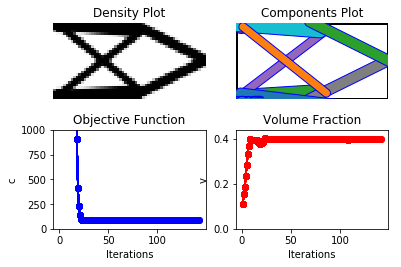

In [20]:
#'MNA'
it, c, v, x, xn, yn, Mc, kktnorm = Generalized_projection.main(nelx,nely,volume_fraction,'MNA',BC,max_iterations)

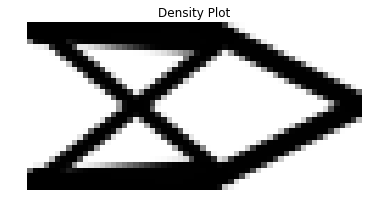

In [21]:
fig=plt.figure()
plt.title('Density Plot')
plt.imshow(-x, cmap='gray', interpolation='none', norm=colors.Normalize(vmin=-1, vmax=0))
plt.axis('off')
plt.show()
fig.savefig('Density plot ' + str(nelx) + ' x '+ str(nely) + ' - ' + str(BC) + ' - MNA - ' + str(volume_fraction) + '.png')     

Geometry Projection (GP)

Start iteration
it.: 1 , obj.: 42358.842 Vol.: 0.074, kktnorm.: 10.001  ch.: 1.000
it.: 2 , obj.: 10282.559 Vol.: 0.113, kktnorm.: 84.904  ch.: 0.088
it.: 3 , obj.: 5623.541 Vol.: 0.149, kktnorm.: 74.311  ch.: 0.085
it.: 4 , obj.: 2786.082 Vol.: 0.188, kktnorm.: 64.700  ch.: 0.092
it.: 5 , obj.: 1782.644 Vol.: 0.240, kktnorm.: 54.308  ch.: 0.090
it.: 6 , obj.: 1236.182 Vol.: 0.285, kktnorm.: 40.610  ch.: 0.098
it.: 7 , obj.: 883.721 Vol.: 0.321, kktnorm.: 29.398  ch.: 0.101
it.: 8 , obj.: 657.544 Vol.: 0.370, kktnorm.: 20.178  ch.: 0.093
it.: 9 , obj.: 553.803 Vol.: 0.390, kktnorm.: 8.031  ch.: 0.075
it.: 10 , obj.: 504.600 Vol.: 0.396, kktnorm.: 3.352  ch.: 0.068
it.: 11 , obj.: 469.474 Vol.: 0.397, kktnorm.: 2.887  ch.: 0.078
it.: 12 , obj.: 436.708 Vol.: 0.396, kktnorm.: 3.195  ch.: 0.085
it.: 13 , obj.: 401.093 Vol.: 0.395, kktnorm.: 3.958  ch.: 0.101
it.: 14 , obj.: 361.410 Vol.: 0.396, kktnorm.: 3.927  ch.: 0.121
it.: 15 , obj.: 321.751 Vol.: 0.395, kktnorm.: 3.417  ch.: 0.141
it

it.: 128 , obj.: 74.935 Vol.: 0.400, kktnorm.: 0.083  ch.: 0.002
it.: 129 , obj.: 74.935 Vol.: 0.400, kktnorm.: 0.075  ch.: 0.002
it.: 130 , obj.: 74.935 Vol.: 0.400, kktnorm.: 0.068  ch.: 0.009
it.: 131 , obj.: 74.935 Vol.: 0.400, kktnorm.: 0.062  ch.: 0.001
Plots Saved


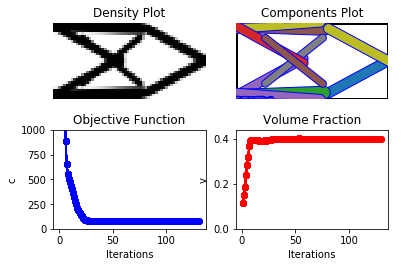

In [22]:
#'GP'
it, c, v, x, xn, yn, Mc, kktnorm = Generalized_projection.main(nelx,nely,volume_fraction,'GP',BC,max_iterations)

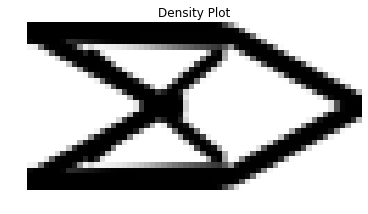

In [23]:
fig=plt.figure()
plt.title('Density Plot')
plt.imshow(-x, cmap='gray', interpolation='none', norm=colors.Normalize(vmin=-1, vmax=0))
plt.axis('off')
plt.show()
fig.savefig('Density plot ' + str(nelx) + ' x '+ str(nely) + ' - ' + str(BC) + ' - GP - ' + str(volume_fraction) + '.png')     

### Extras Plots:

Different mesh sizes:

160 x 80

Start iteration
it.: 1 , obj.: 6885.758 Vol.: 0.090, kktnorm.: 10.001  ch.: 1.000
it.: 2 , obj.: 2546.139 Vol.: 0.178, kktnorm.: 83.972  ch.: 0.072
it.: 3 , obj.: 1041.740 Vol.: 0.252, kktnorm.: 67.994  ch.: 0.068
it.: 4 , obj.: 372.926 Vol.: 0.300, kktnorm.: 52.148  ch.: 0.058
it.: 5 , obj.: 237.107 Vol.: 0.325, kktnorm.: 124.557  ch.: 0.054
it.: 6 , obj.: 194.744 Vol.: 0.365, kktnorm.: 23.880  ch.: 0.047
it.: 7 , obj.: 167.054 Vol.: 0.384, kktnorm.: 16.259  ch.: 0.047
it.: 8 , obj.: 153.588 Vol.: 0.398, kktnorm.: 9.262  ch.: 0.045
it.: 9 , obj.: 133.571 Vol.: 0.398, kktnorm.: 7.699  ch.: 0.042
it.: 10 , obj.: 127.974 Vol.: 0.397, kktnorm.: 5.866  ch.: 0.050
it.: 11 , obj.: 124.181 Vol.: 0.397, kktnorm.: 5.030  ch.: 0.034
it.: 12 , obj.: 124.772 Vol.: 0.398, kktnorm.: 4.233  ch.: 0.033
it.: 13 , obj.: 129.160 Vol.: 0.394, kktnorm.: 11.527  ch.: 0.087
it.: 14 , obj.: 120.632 Vol.: 0.397, kktnorm.: 6.768  ch.: 0.044
it.: 15 , obj.: 117.082 Vol.: 0.399, kktnorm.: 5.527  ch.: 0.047
it.: 1

it.: 128 , obj.: 92.970 Vol.: 0.400, kktnorm.: 0.767  ch.: 0.014
it.: 129 , obj.: 92.891 Vol.: 0.400, kktnorm.: 0.820  ch.: 0.011
it.: 130 , obj.: 92.847 Vol.: 0.400, kktnorm.: 0.644  ch.: 0.010
it.: 131 , obj.: 92.832 Vol.: 0.400, kktnorm.: 0.685  ch.: 0.010
it.: 132 , obj.: 92.854 Vol.: 0.400, kktnorm.: 0.699  ch.: 0.009
it.: 133 , obj.: 92.930 Vol.: 0.400, kktnorm.: 1.528  ch.: 0.010
it.: 134 , obj.: 92.806 Vol.: 0.400, kktnorm.: 1.363  ch.: 0.006
it.: 135 , obj.: 92.761 Vol.: 0.400, kktnorm.: 0.591  ch.: 0.006
it.: 136 , obj.: 92.735 Vol.: 0.400, kktnorm.: 0.501  ch.: 0.007
it.: 137 , obj.: 92.713 Vol.: 0.400, kktnorm.: 0.499  ch.: 0.006
it.: 138 , obj.: 92.692 Vol.: 0.400, kktnorm.: 0.539  ch.: 0.006
it.: 139 , obj.: 92.673 Vol.: 0.400, kktnorm.: 0.596  ch.: 0.009
it.: 140 , obj.: 92.636 Vol.: 0.400, kktnorm.: 0.602  ch.: 0.009
it.: 141 , obj.: 92.617 Vol.: 0.400, kktnorm.: 0.661  ch.: 0.012
it.: 142 , obj.: 92.674 Vol.: 0.400, kktnorm.: 0.655  ch.: 0.008
it.: 143 , obj.: 92.608 V

it.: 255 , obj.: 91.643 Vol.: 0.400, kktnorm.: 0.336  ch.: 0.003
it.: 256 , obj.: 91.635 Vol.: 0.400, kktnorm.: 0.261  ch.: 0.001
Plots Saved


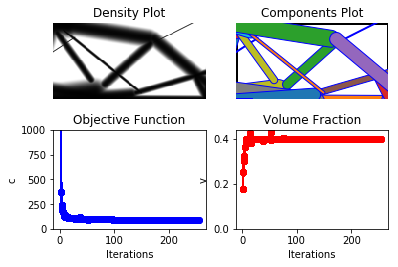

In [24]:
it, c, v, x, xn, yn, Mc, kktnorm = Generalized_projection.main(160,80,volume_fraction,method,'MBB',max_iterations)

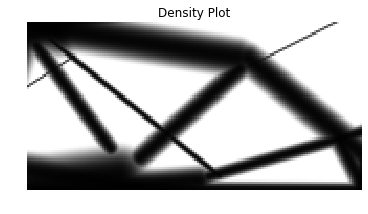

Plot Saved


In [25]:
fig=plt.figure()
plt.title('Density Plot')
plt.imshow(-x, cmap='gray', interpolation='none', norm=colors.Normalize(vmin=-1, vmax=0))
plt.axis('off')
plt.show()
fig.savefig('Density plot 160 x 80 - ' + 'MBB' + ' - ' + str(method) + str(volume_fraction) + '.png')     
print("Plot Saved" )

120 x 60

Start iteration
it.: 1 , obj.: 5223.069 Vol.: 0.118, kktnorm.: 10.001  ch.: 1.000
it.: 2 , obj.: 1822.000 Vol.: 0.208, kktnorm.: 76.969  ch.: 0.073
it.: 3 , obj.: 666.192 Vol.: 0.270, kktnorm.: 60.507  ch.: 0.064
it.: 4 , obj.: 287.395 Vol.: 0.303, kktnorm.: 49.926  ch.: 0.060
it.: 5 , obj.: 220.738 Vol.: 0.341, kktnorm.: 33.473  ch.: 0.061
it.: 6 , obj.: 182.101 Vol.: 0.374, kktnorm.: 19.888  ch.: 0.033
it.: 7 , obj.: 164.575 Vol.: 0.387, kktnorm.: 11.342  ch.: 0.039
it.: 8 , obj.: 154.507 Vol.: 0.393, kktnorm.: 6.995  ch.: 0.033
it.: 9 , obj.: 146.265 Vol.: 0.397, kktnorm.: 6.315  ch.: 0.024
it.: 10 , obj.: 140.472 Vol.: 0.397, kktnorm.: 5.625  ch.: 0.022
it.: 11 , obj.: 135.001 Vol.: 0.397, kktnorm.: 5.492  ch.: 0.027
it.: 12 , obj.: 129.213 Vol.: 0.399, kktnorm.: 5.352  ch.: 0.031
it.: 13 , obj.: 128.296 Vol.: 0.393, kktnorm.: 4.625  ch.: 0.037
it.: 14 , obj.: 122.579 Vol.: 0.397, kktnorm.: 4.579  ch.: 0.038
it.: 15 , obj.: 119.253 Vol.: 0.398, kktnorm.: 4.405  ch.: 0.046
it.: 16 ,

it.: 128 , obj.: 96.560 Vol.: 0.400, kktnorm.: 0.502  ch.: 0.005
it.: 129 , obj.: 96.526 Vol.: 0.400, kktnorm.: 0.479  ch.: 0.007
it.: 130 , obj.: 96.485 Vol.: 0.400, kktnorm.: 0.479  ch.: 0.005
it.: 131 , obj.: 96.430 Vol.: 0.400, kktnorm.: 0.498  ch.: 0.005
it.: 132 , obj.: 96.364 Vol.: 0.400, kktnorm.: 0.503  ch.: 0.006
it.: 133 , obj.: 96.293 Vol.: 0.400, kktnorm.: 0.463  ch.: 0.007
it.: 134 , obj.: 96.216 Vol.: 0.400, kktnorm.: 0.429  ch.: 0.008
it.: 135 , obj.: 96.129 Vol.: 0.400, kktnorm.: 0.388  ch.: 0.021
it.: 136 , obj.: 95.992 Vol.: 0.400, kktnorm.: 0.412  ch.: 0.026
it.: 137 , obj.: 95.884 Vol.: 0.400, kktnorm.: 0.463  ch.: 0.030
it.: 138 , obj.: 95.721 Vol.: 0.400, kktnorm.: 0.567  ch.: 0.037
it.: 139 , obj.: 95.588 Vol.: 0.400, kktnorm.: 0.663  ch.: 0.043
it.: 140 , obj.: 95.472 Vol.: 0.400, kktnorm.: 0.710  ch.: 0.051
it.: 141 , obj.: 95.308 Vol.: 0.400, kktnorm.: 0.512  ch.: 0.045
it.: 142 , obj.: 95.274 Vol.: 0.400, kktnorm.: 0.428  ch.: 0.016
it.: 143 , obj.: 95.235 V

it.: 255 , obj.: 91.214 Vol.: 0.400, kktnorm.: 0.213  ch.: 0.006
it.: 256 , obj.: 91.261 Vol.: 0.400, kktnorm.: 0.700  ch.: 0.011
it.: 257 , obj.: 91.606 Vol.: 0.399, kktnorm.: 1.182  ch.: 0.013
it.: 258 , obj.: 91.123 Vol.: 0.402, kktnorm.: 1.658  ch.: 0.006
it.: 259 , obj.: 91.361 Vol.: 0.400, kktnorm.: 1.445  ch.: 0.008
it.: 260 , obj.: 91.329 Vol.: 0.400, kktnorm.: 1.069  ch.: 0.004
it.: 261 , obj.: 91.308 Vol.: 0.400, kktnorm.: 0.963  ch.: 0.004
it.: 262 , obj.: 91.288 Vol.: 0.400, kktnorm.: 0.818  ch.: 0.004
it.: 263 , obj.: 91.269 Vol.: 0.400, kktnorm.: 0.693  ch.: 0.003
it.: 264 , obj.: 91.254 Vol.: 0.400, kktnorm.: 0.572  ch.: 0.003
it.: 265 , obj.: 91.240 Vol.: 0.400, kktnorm.: 0.442  ch.: 0.003
it.: 266 , obj.: 91.224 Vol.: 0.400, kktnorm.: 0.337  ch.: 0.003
it.: 267 , obj.: 91.147 Vol.: 0.400, kktnorm.: 0.274  ch.: 0.006
it.: 268 , obj.: 91.218 Vol.: 0.400, kktnorm.: 0.260  ch.: 0.004
it.: 269 , obj.: 91.216 Vol.: 0.400, kktnorm.: 0.155  ch.: 0.003
it.: 270 , obj.: 91.213 V

it.: 382 , obj.: 90.983 Vol.: 0.401, kktnorm.: 0.281  ch.: 0.008
it.: 383 , obj.: 90.978 Vol.: 0.401, kktnorm.: 0.287  ch.: 0.010
it.: 384 , obj.: 91.113 Vol.: 0.400, kktnorm.: 0.372  ch.: 0.004
it.: 385 , obj.: 91.121 Vol.: 0.400, kktnorm.: 0.067  ch.: 0.001
Plots Saved


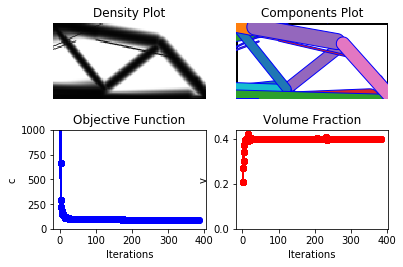

In [26]:
it, c, v, x, xn, yn, Mc, kktnorm = Generalized_projection.main(120,60,volume_fraction,method,'MBB',max_iterations)

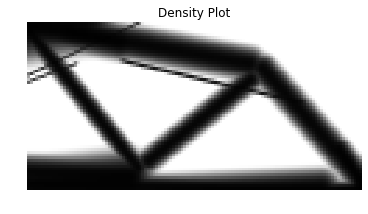

Plot Saved


In [27]:
fig=plt.figure()
plt.title('Density Plot')
plt.imshow(-x, cmap='gray', interpolation='none', norm=colors.Normalize(vmin=-1, vmax=0))
plt.axis('off')
plt.show()
fig.savefig('Density plot 120 x 60 - ' + 'MBB' + ' - ' + str(method) + str(volume_fraction) + '.png')     
print("Plot Saved" )

80 x 40

Start iteration
it.: 1 , obj.: 3018.916 Vol.: 0.174, kktnorm.: 10.001  ch.: 1.000
it.: 2 , obj.: 1007.406 Vol.: 0.262, kktnorm.: 64.999  ch.: 0.070
it.: 3 , obj.: 492.115 Vol.: 0.302, kktnorm.: 51.506  ch.: 0.059
it.: 4 , obj.: 235.482 Vol.: 0.327, kktnorm.: 36.141  ch.: 0.056
it.: 5 , obj.: 180.734 Vol.: 0.360, kktnorm.: 27.422  ch.: 0.060
it.: 6 , obj.: 158.058 Vol.: 0.373, kktnorm.: 13.690  ch.: 0.049
it.: 7 , obj.: 140.929 Vol.: 0.391, kktnorm.: 10.157  ch.: 0.048
it.: 8 , obj.: 132.039 Vol.: 0.398, kktnorm.: 5.096  ch.: 0.057
it.: 9 , obj.: 126.842 Vol.: 0.401, kktnorm.: 4.744  ch.: 0.035
it.: 10 , obj.: 124.270 Vol.: 0.398, kktnorm.: 4.209  ch.: 0.032
it.: 11 , obj.: 120.924 Vol.: 0.397, kktnorm.: 3.461  ch.: 0.028
it.: 12 , obj.: 126.428 Vol.: 0.408, kktnorm.: 7.582  ch.: 0.053
it.: 13 , obj.: 124.351 Vol.: 0.393, kktnorm.: 7.674  ch.: 0.048
it.: 14 , obj.: 118.672 Vol.: 0.396, kktnorm.: 5.924  ch.: 0.037
it.: 15 , obj.: 110.086 Vol.: 0.394, kktnorm.: 4.339  ch.: 0.055
it.: 16 ,

it.: 128 , obj.: 97.187 Vol.: 0.400, kktnorm.: 0.557  ch.: 0.037
it.: 129 , obj.: 97.083 Vol.: 0.400, kktnorm.: 0.381  ch.: 0.008
it.: 130 , obj.: 97.051 Vol.: 0.400, kktnorm.: 0.268  ch.: 0.010
it.: 131 , obj.: 97.035 Vol.: 0.400, kktnorm.: 0.615  ch.: 0.008
it.: 132 , obj.: 97.008 Vol.: 0.400, kktnorm.: 0.257  ch.: 0.007
it.: 133 , obj.: 96.982 Vol.: 0.400, kktnorm.: 0.289  ch.: 0.006
it.: 134 , obj.: 96.964 Vol.: 0.400, kktnorm.: 0.226  ch.: 0.007
it.: 135 , obj.: 96.942 Vol.: 0.400, kktnorm.: 0.229  ch.: 0.007
it.: 136 , obj.: 96.926 Vol.: 0.400, kktnorm.: 0.267  ch.: 0.008
it.: 137 , obj.: 96.871 Vol.: 0.400, kktnorm.: 0.252  ch.: 0.038
it.: 138 , obj.: 96.870 Vol.: 0.400, kktnorm.: 0.316  ch.: 0.013
it.: 139 , obj.: 96.902 Vol.: 0.400, kktnorm.: 0.314  ch.: 0.005
it.: 140 , obj.: 96.888 Vol.: 0.400, kktnorm.: 0.311  ch.: 0.005
it.: 141 , obj.: 96.873 Vol.: 0.400, kktnorm.: 0.315  ch.: 0.004
it.: 142 , obj.: 96.847 Vol.: 0.400, kktnorm.: 0.366  ch.: 0.005
it.: 143 , obj.: 96.834 V

it.: 255 , obj.: 94.107 Vol.: 0.400, kktnorm.: 0.171  ch.: 0.004
it.: 256 , obj.: 94.102 Vol.: 0.400, kktnorm.: 0.152  ch.: 0.004
it.: 257 , obj.: 94.098 Vol.: 0.400, kktnorm.: 0.149  ch.: 0.006
it.: 258 , obj.: 94.093 Vol.: 0.400, kktnorm.: 0.110  ch.: 0.005
it.: 259 , obj.: 94.091 Vol.: 0.400, kktnorm.: 0.178  ch.: 0.005
it.: 260 , obj.: 94.082 Vol.: 0.400, kktnorm.: 0.217  ch.: 0.005
it.: 261 , obj.: 94.110 Vol.: 0.400, kktnorm.: 0.927  ch.: 0.007
it.: 262 , obj.: 94.081 Vol.: 0.400, kktnorm.: 0.371  ch.: 0.011
it.: 263 , obj.: 94.079 Vol.: 0.400, kktnorm.: 0.157  ch.: 0.012
it.: 264 , obj.: 94.073 Vol.: 0.400, kktnorm.: 0.092  ch.: 0.006
it.: 265 , obj.: 94.068 Vol.: 0.400, kktnorm.: 0.090  ch.: 0.004
it.: 266 , obj.: 94.066 Vol.: 0.400, kktnorm.: 0.147  ch.: 0.004
it.: 267 , obj.: 94.044 Vol.: 0.400, kktnorm.: 0.126  ch.: 0.047
it.: 268 , obj.: 94.063 Vol.: 0.400, kktnorm.: 0.141  ch.: 0.009
it.: 269 , obj.: 94.062 Vol.: 0.400, kktnorm.: 0.133  ch.: 0.003
it.: 270 , obj.: 94.061 V

it.: 382 , obj.: 93.916 Vol.: 0.400, kktnorm.: 0.192  ch.: 0.004
it.: 383 , obj.: 93.915 Vol.: 0.400, kktnorm.: 0.106  ch.: 0.004
it.: 384 , obj.: 93.915 Vol.: 0.400, kktnorm.: 0.106  ch.: 0.004
it.: 385 , obj.: 93.924 Vol.: 0.400, kktnorm.: 0.144  ch.: 0.005
it.: 386 , obj.: 93.940 Vol.: 0.400, kktnorm.: 0.453  ch.: 0.006
it.: 387 , obj.: 93.916 Vol.: 0.400, kktnorm.: 0.482  ch.: 0.004
it.: 388 , obj.: 93.910 Vol.: 0.400, kktnorm.: 0.230  ch.: 0.006
it.: 389 , obj.: 93.910 Vol.: 0.400, kktnorm.: 0.174  ch.: 0.003
it.: 390 , obj.: 93.909 Vol.: 0.400, kktnorm.: 0.125  ch.: 0.003
it.: 391 , obj.: 93.908 Vol.: 0.400, kktnorm.: 0.082  ch.: 0.003
it.: 392 , obj.: 93.907 Vol.: 0.400, kktnorm.: 0.050  ch.: 0.003
it.: 393 , obj.: 93.906 Vol.: 0.400, kktnorm.: 0.034  ch.: 0.003
it.: 394 , obj.: 93.905 Vol.: 0.400, kktnorm.: 0.030  ch.: 0.003
it.: 395 , obj.: 93.905 Vol.: 0.400, kktnorm.: 0.032  ch.: 0.003
it.: 396 , obj.: 93.904 Vol.: 0.400, kktnorm.: 0.034  ch.: 0.055
it.: 397 , obj.: 93.904 V

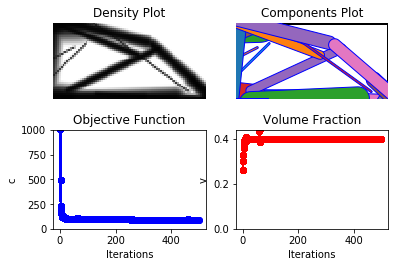

In [28]:
it, c, v, x, xn, yn, Mc, kktnorm = Generalized_projection.main(80,40,volume_fraction,method,'MBB',max_iterations)

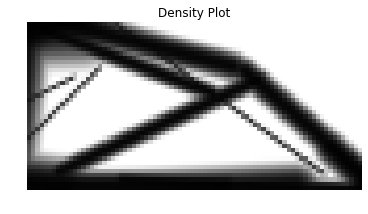

Plot Saved


In [29]:
fig=plt.figure()
plt.title('Density Plot')
plt.imshow(-x, cmap='gray', interpolation='none', norm=colors.Normalize(vmin=-1, vmax=0))
plt.axis('off')
plt.show()
fig.savefig('Density plot 80 x 40 - ' + 'MBB' + ' - ' + str(method) + str(volume_fraction) + '.png')     
print("Plot Saved" )

40 x 20

Start iteration
it.: 1 , obj.: 625.690 Vol.: 0.328, kktnorm.: 10.001  ch.: 1.000
it.: 2 , obj.: 275.332 Vol.: 0.397, kktnorm.: 36.921  ch.: 0.062
it.: 3 , obj.: 202.693 Vol.: 0.395, kktnorm.: 15.745  ch.: 0.044
it.: 4 , obj.: 164.436 Vol.: 0.390, kktnorm.: 14.427  ch.: 0.044
it.: 5 , obj.: 143.957 Vol.: 0.397, kktnorm.: 6.697  ch.: 0.045
it.: 6 , obj.: 134.078 Vol.: 0.396, kktnorm.: 7.618  ch.: 0.045
it.: 7 , obj.: 129.214 Vol.: 0.419, kktnorm.: 7.811  ch.: 0.047
it.: 8 , obj.: 133.461 Vol.: 0.390, kktnorm.: 15.790  ch.: 0.036
it.: 9 , obj.: 125.362 Vol.: 0.395, kktnorm.: 9.633  ch.: 0.024
it.: 10 , obj.: 122.377 Vol.: 0.397, kktnorm.: 7.113  ch.: 0.010
it.: 11 , obj.: 120.877 Vol.: 0.398, kktnorm.: 6.202  ch.: 0.008
it.: 12 , obj.: 119.658 Vol.: 0.399, kktnorm.: 5.380  ch.: 0.008
it.: 13 , obj.: 118.419 Vol.: 0.399, kktnorm.: 7.724  ch.: 0.007
it.: 14 , obj.: 117.355 Vol.: 0.399, kktnorm.: 7.267  ch.: 0.006
it.: 15 , obj.: 116.513 Vol.: 0.399, kktnorm.: 5.205  ch.: 0.006
it.: 16 , obj

it.: 128 , obj.: 90.028 Vol.: 0.400, kktnorm.: 0.516  ch.: 0.011
it.: 129 , obj.: 90.008 Vol.: 0.400, kktnorm.: 0.481  ch.: 0.012
it.: 130 , obj.: 89.975 Vol.: 0.400, kktnorm.: 0.405  ch.: 0.013
it.: 131 , obj.: 89.925 Vol.: 0.400, kktnorm.: 0.361  ch.: 0.014
it.: 132 , obj.: 89.876 Vol.: 0.400, kktnorm.: 0.385  ch.: 0.014
it.: 133 , obj.: 89.844 Vol.: 0.400, kktnorm.: 0.409  ch.: 0.018
it.: 134 , obj.: 89.807 Vol.: 0.400, kktnorm.: 0.390  ch.: 0.016
it.: 135 , obj.: 89.780 Vol.: 0.400, kktnorm.: 0.354  ch.: 0.022
it.: 136 , obj.: 89.744 Vol.: 0.400, kktnorm.: 0.365  ch.: 0.013
it.: 137 , obj.: 89.708 Vol.: 0.400, kktnorm.: 0.352  ch.: 0.015
it.: 138 , obj.: 89.656 Vol.: 0.400, kktnorm.: 0.390  ch.: 0.015
it.: 139 , obj.: 89.590 Vol.: 0.400, kktnorm.: 0.427  ch.: 0.013
it.: 140 , obj.: 89.555 Vol.: 0.400, kktnorm.: 0.422  ch.: 0.015
it.: 141 , obj.: 89.530 Vol.: 0.400, kktnorm.: 0.405  ch.: 0.015
it.: 142 , obj.: 89.711 Vol.: 0.400, kktnorm.: 0.566  ch.: 0.021
it.: 143 , obj.: 89.703 V

it.: 255 , obj.: 87.604 Vol.: 0.400, kktnorm.: 0.193  ch.: 0.003
it.: 256 , obj.: 87.597 Vol.: 0.400, kktnorm.: 0.190  ch.: 0.003
it.: 257 , obj.: 87.591 Vol.: 0.400, kktnorm.: 0.187  ch.: 0.003
it.: 258 , obj.: 87.585 Vol.: 0.400, kktnorm.: 0.182  ch.: 0.003
it.: 259 , obj.: 87.579 Vol.: 0.400, kktnorm.: 0.192  ch.: 0.003
it.: 260 , obj.: 87.589 Vol.: 0.400, kktnorm.: 0.177  ch.: 0.005
it.: 261 , obj.: 87.628 Vol.: 0.400, kktnorm.: 0.530  ch.: 0.009
it.: 262 , obj.: 87.858 Vol.: 0.400, kktnorm.: 0.819  ch.: 0.010
it.: 263 , obj.: 87.540 Vol.: 0.401, kktnorm.: 1.963  ch.: 0.012
it.: 264 , obj.: 87.424 Vol.: 0.401, kktnorm.: 0.594  ch.: 0.007
it.: 265 , obj.: 87.556 Vol.: 0.400, kktnorm.: 0.790  ch.: 0.004
it.: 266 , obj.: 87.616 Vol.: 0.400, kktnorm.: 0.347  ch.: 0.002
Plots Saved


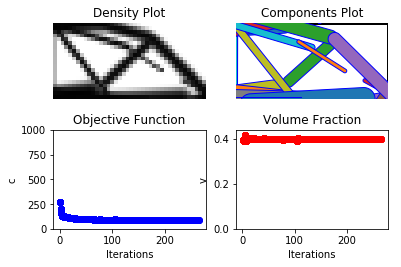

In [30]:
it, c, v, x, xn, yn, Mc, kktnorm = Generalized_projection.main(40,20,volume_fraction,method,'MBB',max_iterations)

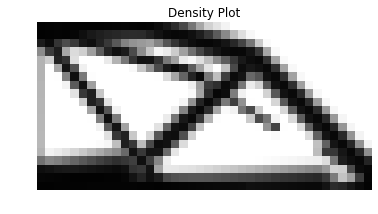

Plot Saved


In [31]:
fig=plt.figure()
plt.title('Density Plot')
plt.imshow(-x, cmap='gray', interpolation='none', norm=colors.Normalize(vmin=-1, vmax=0))
plt.axis('off')
plt.show()
fig.savefig('Density plot 40 x 20 - ' + 'MBB' + ' - ' + str(method) + str(volume_fraction) + '.png')     
print("Plot Saved" )

Check the graphic of the objective function in terms of the volume fraction

Start iteration
it.: 1 , obj.: 647.567 Vol.: 0.227, kktnorm.: 10.001  ch.: 1.000
it.: 2 , obj.: 190.274 Vol.: 0.323, kktnorm.: 73.161  ch.: 0.076
it.: 3 , obj.: 124.005 Vol.: 0.375, kktnorm.: 56.151  ch.: 0.070
it.: 4 , obj.: 99.622 Vol.: 0.441, kktnorm.: 49.096  ch.: 0.070
it.: 5 , obj.: 79.998 Vol.: 0.500, kktnorm.: 38.273  ch.: 0.066
it.: 6 , obj.: 68.078 Vol.: 0.558, kktnorm.: 29.236  ch.: 0.068
it.: 7 , obj.: 59.478 Vol.: 0.620, kktnorm.: 20.731  ch.: 0.071
it.: 8 , obj.: 54.308 Vol.: 0.669, kktnorm.: 12.005  ch.: 0.054
it.: 9 , obj.: 51.900 Vol.: 0.693, kktnorm.: 4.731  ch.: 0.036
it.: 10 , obj.: 50.860 Vol.: 0.697, kktnorm.: 2.453  ch.: 0.026
it.: 11 , obj.: 50.345 Vol.: 0.698, kktnorm.: 1.710  ch.: 0.025
it.: 12 , obj.: 49.966 Vol.: 0.698, kktnorm.: 1.366  ch.: 0.027
it.: 13 , obj.: 49.668 Vol.: 0.698, kktnorm.: 1.114  ch.: 0.031
it.: 14 , obj.: 49.425 Vol.: 0.699, kktnorm.: 0.880  ch.: 0.033
it.: 15 , obj.: 49.223 Vol.: 0.699, kktnorm.: 0.687  ch.: 0.039
it.: 16 , obj.: 49.008

it.: 129 , obj.: 46.302 Vol.: 0.700, kktnorm.: 0.338  ch.: 0.034
it.: 130 , obj.: 46.291 Vol.: 0.700, kktnorm.: 0.281  ch.: 0.010
it.: 131 , obj.: 46.276 Vol.: 0.700, kktnorm.: 0.249  ch.: 0.006
it.: 132 , obj.: 46.263 Vol.: 0.700, kktnorm.: 0.225  ch.: 0.006
it.: 133 , obj.: 46.251 Vol.: 0.700, kktnorm.: 0.195  ch.: 0.008
it.: 134 , obj.: 46.238 Vol.: 0.700, kktnorm.: 0.155  ch.: 0.008
it.: 135 , obj.: 46.222 Vol.: 0.700, kktnorm.: 0.153  ch.: 0.008
it.: 136 , obj.: 46.208 Vol.: 0.700, kktnorm.: 0.127  ch.: 0.011
it.: 137 , obj.: 46.201 Vol.: 0.700, kktnorm.: 0.149  ch.: 0.014
it.: 138 , obj.: 46.194 Vol.: 0.700, kktnorm.: 0.079  ch.: 0.015
it.: 139 , obj.: 46.173 Vol.: 0.700, kktnorm.: 0.110  ch.: 0.012
it.: 140 , obj.: 46.163 Vol.: 0.700, kktnorm.: 0.072  ch.: 0.013
it.: 141 , obj.: 46.153 Vol.: 0.700, kktnorm.: 0.092  ch.: 0.035
it.: 142 , obj.: 46.145 Vol.: 0.700, kktnorm.: 0.100  ch.: 0.012
it.: 143 , obj.: 46.140 Vol.: 0.700, kktnorm.: 0.073  ch.: 0.013
it.: 144 , obj.: 47.021 V

it.: 56 , obj.: 49.267 Vol.: 0.650, kktnorm.: 0.143  ch.: 0.004
it.: 57 , obj.: 49.265 Vol.: 0.650, kktnorm.: 0.129  ch.: 0.004
it.: 58 , obj.: 49.263 Vol.: 0.650, kktnorm.: 0.116  ch.: 0.004
it.: 59 , obj.: 49.260 Vol.: 0.650, kktnorm.: 0.106  ch.: 0.004
it.: 60 , obj.: 49.258 Vol.: 0.650, kktnorm.: 0.097  ch.: 0.009
it.: 61 , obj.: 49.255 Vol.: 0.650, kktnorm.: 0.089  ch.: 0.014
it.: 62 , obj.: 49.251 Vol.: 0.650, kktnorm.: 0.083  ch.: 0.016
it.: 63 , obj.: 49.248 Vol.: 0.650, kktnorm.: 0.080  ch.: 0.015
it.: 64 , obj.: 49.244 Vol.: 0.650, kktnorm.: 0.071  ch.: 0.016
it.: 65 , obj.: 49.240 Vol.: 0.650, kktnorm.: 0.079  ch.: 0.006
it.: 66 , obj.: 49.236 Vol.: 0.650, kktnorm.: 0.060  ch.: 0.014
it.: 67 , obj.: 49.232 Vol.: 0.650, kktnorm.: 0.060  ch.: 0.018
it.: 68 , obj.: 49.228 Vol.: 0.650, kktnorm.: 0.055  ch.: 0.016
it.: 69 , obj.: 49.225 Vol.: 0.650, kktnorm.: 0.057  ch.: 0.017
it.: 70 , obj.: 49.220 Vol.: 0.650, kktnorm.: 0.059  ch.: 0.060
it.: 71 , obj.: 49.217 Vol.: 0.650, kktn

it.: 98 , obj.: 52.437 Vol.: 0.600, kktnorm.: 0.103  ch.: 0.002
it.: 99 , obj.: 52.436 Vol.: 0.600, kktnorm.: 0.101  ch.: 0.002
it.: 100 , obj.: 52.434 Vol.: 0.600, kktnorm.: 0.097  ch.: 0.002
it.: 101 , obj.: 52.431 Vol.: 0.600, kktnorm.: 0.100  ch.: 0.002
it.: 102 , obj.: 52.430 Vol.: 0.600, kktnorm.: 0.096  ch.: 0.002
it.: 103 , obj.: 52.428 Vol.: 0.600, kktnorm.: 0.096  ch.: 0.007
it.: 104 , obj.: 52.426 Vol.: 0.600, kktnorm.: 0.096  ch.: 0.013
it.: 105 , obj.: 52.424 Vol.: 0.600, kktnorm.: 0.097  ch.: 0.031
it.: 106 , obj.: 52.421 Vol.: 0.600, kktnorm.: 0.098  ch.: 0.017
it.: 107 , obj.: 52.418 Vol.: 0.600, kktnorm.: 0.103  ch.: 0.017
it.: 108 , obj.: 52.422 Vol.: 0.600, kktnorm.: 0.115  ch.: 0.006
it.: 109 , obj.: 52.413 Vol.: 0.600, kktnorm.: 0.120  ch.: 0.006
it.: 110 , obj.: 52.409 Vol.: 0.600, kktnorm.: 0.098  ch.: 0.012
it.: 111 , obj.: 52.404 Vol.: 0.600, kktnorm.: 0.095  ch.: 0.007
it.: 112 , obj.: 52.397 Vol.: 0.600, kktnorm.: 0.097  ch.: 0.007
it.: 113 , obj.: 52.395 Vol

it.: 24 , obj.: 59.067 Vol.: 0.542, kktnorm.: 1.037  ch.: 0.140
it.: 25 , obj.: 58.332 Vol.: 0.545, kktnorm.: 1.877  ch.: 0.114
it.: 26 , obj.: 57.744 Vol.: 0.547, kktnorm.: 1.273  ch.: 0.069
it.: 27 , obj.: 57.328 Vol.: 0.549, kktnorm.: 1.412  ch.: 0.036
it.: 28 , obj.: 57.153 Vol.: 0.549, kktnorm.: 0.593  ch.: 0.027
it.: 29 , obj.: 57.006 Vol.: 0.549, kktnorm.: 0.595  ch.: 0.034
it.: 30 , obj.: 56.841 Vol.: 0.549, kktnorm.: 0.634  ch.: 0.032
it.: 31 , obj.: 56.705 Vol.: 0.550, kktnorm.: 0.535  ch.: 0.025
it.: 32 , obj.: 56.598 Vol.: 0.550, kktnorm.: 0.586  ch.: 0.027
it.: 33 , obj.: 56.485 Vol.: 0.549, kktnorm.: 0.558  ch.: 0.039
it.: 34 , obj.: 56.315 Vol.: 0.550, kktnorm.: 0.581  ch.: 0.030
it.: 35 , obj.: 56.284 Vol.: 0.550, kktnorm.: 0.574  ch.: 0.022
it.: 36 , obj.: 56.172 Vol.: 0.550, kktnorm.: 0.596  ch.: 0.024
it.: 37 , obj.: 56.109 Vol.: 0.550, kktnorm.: 0.601  ch.: 0.020
it.: 38 , obj.: 56.060 Vol.: 0.550, kktnorm.: 0.602  ch.: 0.013
it.: 39 , obj.: 55.971 Vol.: 0.550, kktn

it.: 152 , obj.: 55.255 Vol.: 0.550, kktnorm.: 0.090  ch.: 0.001
it.: 153 , obj.: 55.256 Vol.: 0.550, kktnorm.: 0.085  ch.: 0.002
it.: 154 , obj.: 55.256 Vol.: 0.550, kktnorm.: 0.161  ch.: 0.002
it.: 155 , obj.: 55.253 Vol.: 0.550, kktnorm.: 0.125  ch.: 0.002
it.: 156 , obj.: 55.250 Vol.: 0.550, kktnorm.: 0.105  ch.: 0.001
it.: 157 , obj.: 55.249 Vol.: 0.550, kktnorm.: 0.079  ch.: 0.002
it.: 158 , obj.: 55.248 Vol.: 0.550, kktnorm.: 0.078  ch.: 0.002
it.: 159 , obj.: 55.247 Vol.: 0.550, kktnorm.: 0.073  ch.: 0.002
it.: 160 , obj.: 55.246 Vol.: 0.550, kktnorm.: 0.067  ch.: 0.002
it.: 161 , obj.: 55.244 Vol.: 0.550, kktnorm.: 0.062  ch.: 0.002
it.: 162 , obj.: 55.243 Vol.: 0.550, kktnorm.: 0.056  ch.: 0.002
it.: 163 , obj.: 55.242 Vol.: 0.550, kktnorm.: 0.054  ch.: 0.002
it.: 164 , obj.: 55.240 Vol.: 0.550, kktnorm.: 0.053  ch.: 0.002
it.: 165 , obj.: 55.238 Vol.: 0.550, kktnorm.: 0.094  ch.: 0.004
it.: 166 , obj.: 55.236 Vol.: 0.550, kktnorm.: 0.129  ch.: 0.003
it.: 167 , obj.: 55.232 V

it.: 99 , obj.: 60.882 Vol.: 0.500, kktnorm.: 0.224  ch.: 0.005
it.: 100 , obj.: 60.876 Vol.: 0.500, kktnorm.: 0.208  ch.: 0.005
it.: 101 , obj.: 60.869 Vol.: 0.500, kktnorm.: 0.197  ch.: 0.006
it.: 102 , obj.: 60.863 Vol.: 0.500, kktnorm.: 0.186  ch.: 0.006
it.: 103 , obj.: 60.855 Vol.: 0.500, kktnorm.: 0.154  ch.: 0.006
it.: 104 , obj.: 60.848 Vol.: 0.500, kktnorm.: 0.152  ch.: 0.026
it.: 105 , obj.: 60.845 Vol.: 0.500, kktnorm.: 0.122  ch.: 0.008
it.: 106 , obj.: 60.837 Vol.: 0.500, kktnorm.: 0.231  ch.: 0.005
it.: 107 , obj.: 60.831 Vol.: 0.500, kktnorm.: 0.177  ch.: 0.005
it.: 108 , obj.: 60.888 Vol.: 0.501, kktnorm.: 0.304  ch.: 0.013
it.: 109 , obj.: 61.391 Vol.: 0.509, kktnorm.: 1.413  ch.: 0.090
it.: 110 , obj.: 61.428 Vol.: 0.498, kktnorm.: 3.524  ch.: 0.041
it.: 111 , obj.: 60.960 Vol.: 0.500, kktnorm.: 1.800  ch.: 0.022
it.: 112 , obj.: 60.846 Vol.: 0.500, kktnorm.: 0.800  ch.: 0.021
it.: 113 , obj.: 60.877 Vol.: 0.500, kktnorm.: 0.706  ch.: 0.006
it.: 114 , obj.: 60.869 Vo

it.: 25 , obj.: 68.864 Vol.: 0.446, kktnorm.: 1.702  ch.: 0.129
it.: 26 , obj.: 67.974 Vol.: 0.448, kktnorm.: 1.367  ch.: 0.047
it.: 27 , obj.: 67.778 Vol.: 0.449, kktnorm.: 1.149  ch.: 0.129
it.: 28 , obj.: 67.519 Vol.: 0.448, kktnorm.: 1.405  ch.: 0.033
it.: 29 , obj.: 67.159 Vol.: 0.450, kktnorm.: 1.306  ch.: 0.053
it.: 30 , obj.: 67.033 Vol.: 0.449, kktnorm.: 1.061  ch.: 0.043
it.: 31 , obj.: 66.893 Vol.: 0.450, kktnorm.: 0.886  ch.: 0.013
it.: 32 , obj.: 66.773 Vol.: 0.450, kktnorm.: 0.805  ch.: 0.008
it.: 33 , obj.: 66.696 Vol.: 0.450, kktnorm.: 0.769  ch.: 0.012
it.: 34 , obj.: 66.571 Vol.: 0.450, kktnorm.: 0.685  ch.: 0.013
it.: 35 , obj.: 66.523 Vol.: 0.451, kktnorm.: 0.698  ch.: 0.032
it.: 36 , obj.: 66.699 Vol.: 0.453, kktnorm.: 1.518  ch.: 0.019
it.: 37 , obj.: 66.646 Vol.: 0.448, kktnorm.: 2.923  ch.: 0.013
it.: 38 , obj.: 66.346 Vol.: 0.450, kktnorm.: 1.035  ch.: 0.014
it.: 39 , obj.: 66.256 Vol.: 0.450, kktnorm.: 0.830  ch.: 0.009
it.: 40 , obj.: 66.212 Vol.: 0.450, kktn

it.: 153 , obj.: 65.203 Vol.: 0.450, kktnorm.: 0.501  ch.: 0.003
it.: 154 , obj.: 65.198 Vol.: 0.450, kktnorm.: 0.790  ch.: 0.024
it.: 155 , obj.: 65.373 Vol.: 0.449, kktnorm.: 0.662  ch.: 0.014
it.: 156 , obj.: 65.272 Vol.: 0.450, kktnorm.: 0.631  ch.: 0.004
it.: 157 , obj.: 65.247 Vol.: 0.450, kktnorm.: 0.370  ch.: 0.002
it.: 158 , obj.: 65.237 Vol.: 0.450, kktnorm.: 0.392  ch.: 0.003
it.: 159 , obj.: 65.226 Vol.: 0.450, kktnorm.: 0.416  ch.: 0.003
it.: 160 , obj.: 65.215 Vol.: 0.450, kktnorm.: 0.439  ch.: 0.002
it.: 161 , obj.: 65.206 Vol.: 0.450, kktnorm.: 0.481  ch.: 0.003
it.: 162 , obj.: 65.197 Vol.: 0.450, kktnorm.: 0.544  ch.: 0.003
it.: 163 , obj.: 65.190 Vol.: 0.450, kktnorm.: 0.610  ch.: 0.003
it.: 164 , obj.: 65.184 Vol.: 0.450, kktnorm.: 0.540  ch.: 0.004
it.: 165 , obj.: 65.178 Vol.: 0.450, kktnorm.: 0.324  ch.: 0.004
it.: 166 , obj.: 65.177 Vol.: 0.450, kktnorm.: 0.175  ch.: 0.004
it.: 167 , obj.: 65.314 Vol.: 0.449, kktnorm.: 0.264  ch.: 0.027
it.: 168 , obj.: 65.234 V

it.: 80 , obj.: 73.395 Vol.: 0.400, kktnorm.: 0.368  ch.: 0.007
it.: 81 , obj.: 73.377 Vol.: 0.400, kktnorm.: 1.403  ch.: 0.015
it.: 82 , obj.: 73.367 Vol.: 0.400, kktnorm.: 0.601  ch.: 0.012
it.: 83 , obj.: 73.330 Vol.: 0.400, kktnorm.: 0.504  ch.: 0.005
it.: 84 , obj.: 73.319 Vol.: 0.400, kktnorm.: 0.381  ch.: 0.002
it.: 85 , obj.: 73.314 Vol.: 0.400, kktnorm.: 0.375  ch.: 0.002
it.: 86 , obj.: 73.309 Vol.: 0.400, kktnorm.: 0.349  ch.: 0.002
it.: 87 , obj.: 73.304 Vol.: 0.400, kktnorm.: 0.339  ch.: 0.002
it.: 88 , obj.: 73.299 Vol.: 0.400, kktnorm.: 0.331  ch.: 0.002
it.: 89 , obj.: 73.293 Vol.: 0.400, kktnorm.: 0.323  ch.: 0.005
it.: 90 , obj.: 73.288 Vol.: 0.400, kktnorm.: 0.306  ch.: 0.002
it.: 91 , obj.: 73.303 Vol.: 0.400, kktnorm.: 0.383  ch.: 0.004
it.: 92 , obj.: 73.319 Vol.: 0.400, kktnorm.: 1.048  ch.: 0.007
it.: 93 , obj.: 73.296 Vol.: 0.400, kktnorm.: 0.412  ch.: 0.003
it.: 94 , obj.: 73.291 Vol.: 0.400, kktnorm.: 0.372  ch.: 0.003
it.: 95 , obj.: 73.287 Vol.: 0.400, kktn

it.: 23 , obj.: 102.424 Vol.: 0.349, kktnorm.: 18.984  ch.: 0.015
it.: 24 , obj.: 98.714 Vol.: 0.347, kktnorm.: 20.103  ch.: 0.016
it.: 25 , obj.: 96.759 Vol.: 0.349, kktnorm.: 7.530  ch.: 0.015
it.: 26 , obj.: 95.864 Vol.: 0.350, kktnorm.: 5.403  ch.: 0.012
it.: 27 , obj.: 95.340 Vol.: 0.349, kktnorm.: 3.401  ch.: 0.016
it.: 28 , obj.: 94.720 Vol.: 0.350, kktnorm.: 2.916  ch.: 0.013
it.: 29 , obj.: 94.466 Vol.: 0.350, kktnorm.: 2.837  ch.: 0.008
it.: 30 , obj.: 94.100 Vol.: 0.350, kktnorm.: 2.605  ch.: 0.019
it.: 31 , obj.: 93.803 Vol.: 0.349, kktnorm.: 2.388  ch.: 0.016
it.: 32 , obj.: 91.765 Vol.: 0.352, kktnorm.: 2.165  ch.: 0.093
it.: 33 , obj.: 92.091 Vol.: 0.349, kktnorm.: 3.022  ch.: 0.052
it.: 34 , obj.: 91.769 Vol.: 0.350, kktnorm.: 3.325  ch.: 0.020
it.: 35 , obj.: 91.705 Vol.: 0.349, kktnorm.: 3.599  ch.: 0.028
it.: 36 , obj.: 90.922 Vol.: 0.351, kktnorm.: 2.697  ch.: 0.052
it.: 37 , obj.: 90.910 Vol.: 0.350, kktnorm.: 2.979  ch.: 0.008
it.: 38 , obj.: 90.611 Vol.: 0.350, k

it.: 151 , obj.: 81.967 Vol.: 0.350, kktnorm.: 0.387  ch.: 0.004
it.: 152 , obj.: 81.962 Vol.: 0.350, kktnorm.: 0.361  ch.: 0.003
it.: 153 , obj.: 81.957 Vol.: 0.350, kktnorm.: 0.337  ch.: 0.003
it.: 154 , obj.: 81.952 Vol.: 0.350, kktnorm.: 0.314  ch.: 0.003
it.: 155 , obj.: 81.945 Vol.: 0.350, kktnorm.: 0.297  ch.: 0.003
it.: 156 , obj.: 81.939 Vol.: 0.350, kktnorm.: 0.292  ch.: 0.003
it.: 157 , obj.: 81.927 Vol.: 0.350, kktnorm.: 0.244  ch.: 0.004
it.: 158 , obj.: 81.916 Vol.: 0.350, kktnorm.: 0.246  ch.: 0.005
it.: 159 , obj.: 81.911 Vol.: 0.350, kktnorm.: 0.246  ch.: 0.004
it.: 160 , obj.: 81.901 Vol.: 0.350, kktnorm.: 0.331  ch.: 0.004
it.: 161 , obj.: 82.228 Vol.: 0.349, kktnorm.: 0.399  ch.: 0.024
it.: 162 , obj.: 81.993 Vol.: 0.350, kktnorm.: 1.863  ch.: 0.010
it.: 163 , obj.: 81.891 Vol.: 0.350, kktnorm.: 0.829  ch.: 0.004
it.: 164 , obj.: 81.865 Vol.: 0.350, kktnorm.: 0.581  ch.: 0.003
it.: 165 , obj.: 81.842 Vol.: 0.350, kktnorm.: 0.435  ch.: 0.004
it.: 166 , obj.: 81.821 V

it.: 94 , obj.: 99.105 Vol.: 0.300, kktnorm.: 0.780  ch.: 0.008
it.: 95 , obj.: 99.129 Vol.: 0.300, kktnorm.: 0.709  ch.: 0.006
it.: 96 , obj.: 99.007 Vol.: 0.300, kktnorm.: 0.836  ch.: 0.005
it.: 97 , obj.: 99.047 Vol.: 0.300, kktnorm.: 0.652  ch.: 0.005
it.: 98 , obj.: 99.011 Vol.: 0.300, kktnorm.: 0.656  ch.: 0.008
it.: 99 , obj.: 98.963 Vol.: 0.300, kktnorm.: 0.663  ch.: 0.014
it.: 100 , obj.: 98.927 Vol.: 0.300, kktnorm.: 0.640  ch.: 0.011
it.: 101 , obj.: 98.886 Vol.: 0.300, kktnorm.: 0.616  ch.: 0.011
it.: 102 , obj.: 98.869 Vol.: 0.300, kktnorm.: 0.636  ch.: 0.014
it.: 103 , obj.: 99.091 Vol.: 0.299, kktnorm.: 0.622  ch.: 0.017
it.: 104 , obj.: 98.939 Vol.: 0.300, kktnorm.: 0.807  ch.: 0.016
it.: 105 , obj.: 98.826 Vol.: 0.300, kktnorm.: 0.485  ch.: 0.017
it.: 106 , obj.: 98.807 Vol.: 0.300, kktnorm.: 0.455  ch.: 0.018
it.: 107 , obj.: 98.789 Vol.: 0.300, kktnorm.: 0.425  ch.: 0.019
it.: 108 , obj.: 98.774 Vol.: 0.300, kktnorm.: 0.444  ch.: 0.019
it.: 109 , obj.: 98.774 Vol.: 0

it.: 20 , obj.: 157.245 Vol.: 0.250, kktnorm.: 8.296  ch.: 0.008
it.: 21 , obj.: 154.438 Vol.: 0.250, kktnorm.: 10.492  ch.: 0.010
it.: 22 , obj.: 151.663 Vol.: 0.250, kktnorm.: 10.155  ch.: 0.011
it.: 23 , obj.: 149.673 Vol.: 0.250, kktnorm.: 7.556  ch.: 0.010
it.: 24 , obj.: 149.271 Vol.: 0.249, kktnorm.: 6.412  ch.: 0.011
it.: 25 , obj.: 149.435 Vol.: 0.254, kktnorm.: 7.033  ch.: 0.016
it.: 26 , obj.: 146.585 Vol.: 0.249, kktnorm.: 8.578  ch.: 0.043
it.: 27 , obj.: 144.326 Vol.: 0.250, kktnorm.: 5.956  ch.: 0.014
it.: 28 , obj.: 143.308 Vol.: 0.250, kktnorm.: 4.802  ch.: 0.012
it.: 29 , obj.: 142.541 Vol.: 0.250, kktnorm.: 4.061  ch.: 0.008
it.: 30 , obj.: 141.360 Vol.: 0.250, kktnorm.: 3.591  ch.: 0.010
it.: 31 , obj.: 140.383 Vol.: 0.250, kktnorm.: 3.404  ch.: 0.025
it.: 32 , obj.: 140.460 Vol.: 0.250, kktnorm.: 3.354  ch.: 0.033
it.: 33 , obj.: 139.344 Vol.: 0.249, kktnorm.: 3.244  ch.: 0.025
it.: 34 , obj.: 137.690 Vol.: 0.250, kktnorm.: 2.534  ch.: 0.015
it.: 35 , obj.: 136.453

it.: 13 , obj.: 211.870 Vol.: 0.198, kktnorm.: 18.787  ch.: 0.015
it.: 14 , obj.: 204.953 Vol.: 0.199, kktnorm.: 11.537  ch.: 0.012
it.: 15 , obj.: 200.448 Vol.: 0.199, kktnorm.: 8.489  ch.: 0.010
it.: 16 , obj.: 197.012 Vol.: 0.200, kktnorm.: 7.399  ch.: 0.012
it.: 17 , obj.: 194.832 Vol.: 0.199, kktnorm.: 8.979  ch.: 0.010
it.: 18 , obj.: 192.778 Vol.: 0.200, kktnorm.: 7.641  ch.: 0.011
it.: 19 , obj.: 191.215 Vol.: 0.200, kktnorm.: 7.143  ch.: 0.010
it.: 20 , obj.: 189.799 Vol.: 0.200, kktnorm.: 6.608  ch.: 0.012
it.: 21 , obj.: 187.628 Vol.: 0.200, kktnorm.: 6.883  ch.: 0.015
it.: 22 , obj.: 184.417 Vol.: 0.200, kktnorm.: 6.219  ch.: 0.020
it.: 23 , obj.: 182.791 Vol.: 0.199, kktnorm.: 5.999  ch.: 0.020
it.: 24 , obj.: 181.075 Vol.: 0.199, kktnorm.: 5.332  ch.: 0.061
it.: 25 , obj.: 179.629 Vol.: 0.200, kktnorm.: 4.953  ch.: 0.021
it.: 26 , obj.: 180.949 Vol.: 0.201, kktnorm.: 5.644  ch.: 0.055
it.: 27 , obj.: 177.911 Vol.: 0.200, kktnorm.: 9.956  ch.: 0.025
it.: 28 , obj.: 176.457

it.: 139 , obj.: 153.618 Vol.: 0.200, kktnorm.: 2.884  ch.: 0.007
it.: 140 , obj.: 153.575 Vol.: 0.200, kktnorm.: 1.173  ch.: 0.039
it.: 141 , obj.: 153.631 Vol.: 0.200, kktnorm.: 6.179  ch.: 0.046
it.: 142 , obj.: 153.418 Vol.: 0.200, kktnorm.: 4.176  ch.: 0.016
it.: 143 , obj.: 153.321 Vol.: 0.200, kktnorm.: 1.869  ch.: 0.013
it.: 144 , obj.: 153.336 Vol.: 0.200, kktnorm.: 1.773  ch.: 0.005
it.: 145 , obj.: 153.278 Vol.: 0.200, kktnorm.: 1.508  ch.: 0.005
it.: 146 , obj.: 153.224 Vol.: 0.200, kktnorm.: 2.080  ch.: 0.004
it.: 147 , obj.: 153.168 Vol.: 0.200, kktnorm.: 1.507  ch.: 0.005
it.: 148 , obj.: 153.102 Vol.: 0.200, kktnorm.: 1.326  ch.: 0.004
it.: 149 , obj.: 153.039 Vol.: 0.200, kktnorm.: 1.022  ch.: 0.005
it.: 150 , obj.: 153.000 Vol.: 0.200, kktnorm.: 0.929  ch.: 0.005
it.: 151 , obj.: 152.976 Vol.: 0.200, kktnorm.: 1.041  ch.: 0.006
it.: 152 , obj.: 152.923 Vol.: 0.200, kktnorm.: 0.862  ch.: 0.008
it.: 153 , obj.: 152.855 Vol.: 0.200, kktnorm.: 0.826  ch.: 0.007
it.: 154 ,

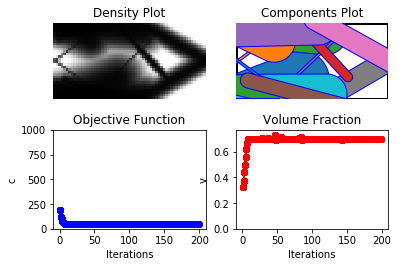

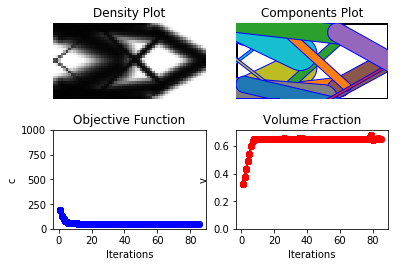

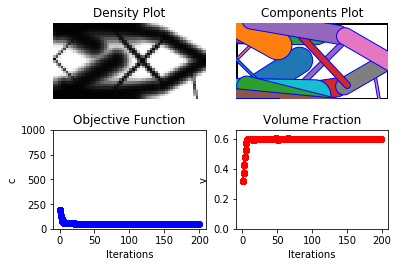

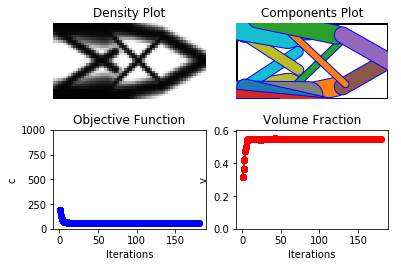

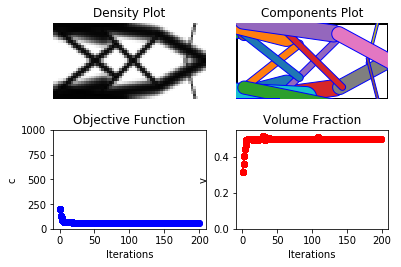

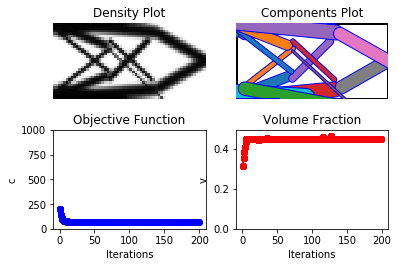

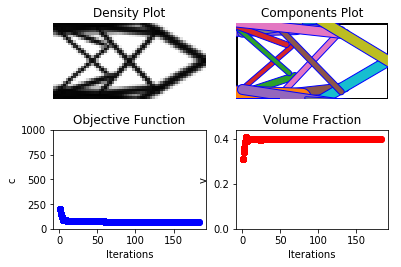

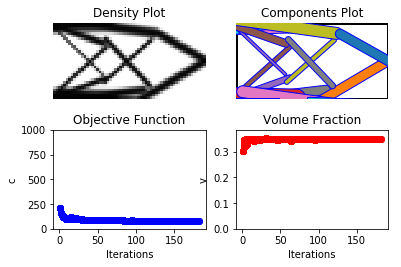

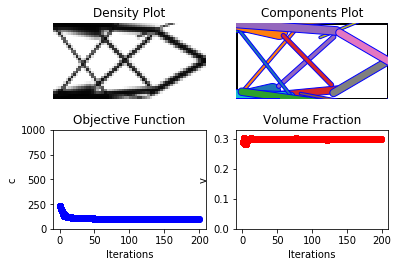

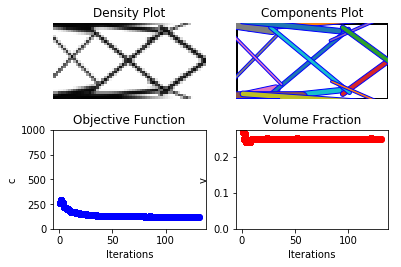

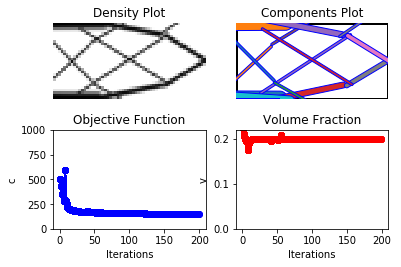

In [32]:
it70, c70, aa, bb, cc, dd, ee, ff = Generalized_projection.main(nelx,nely,0.70,method,BC,200)
it65, c65, aa, bb, cc, dd, ee, ff = Generalized_projection.main(nelx,nely,0.65,method,BC,200)
it60, c60, aa, bb, cc, dd, ee, ff = Generalized_projection.main(nelx,nely,0.60,method,BC,200)
it55, c55, aa, bb, cc, dd, ee, ff = Generalized_projection.main(nelx,nely,0.55,method,BC,200)
it50, c50, aa, bb, cc, dd, ee, ff = Generalized_projection.main(nelx,nely,0.50,method,BC,200)
it45, c45, aa, bb, cc, dd, ee, ff = Generalized_projection.main(nelx,nely,0.45,method,BC,200)
it40, c40, aa, bb, cc, dd, ee, ff = Generalized_projection.main(nelx,nely,0.40,method,BC,200)
it35, c35, aa, bb, cc, dd, ee, ff = Generalized_projection.main(nelx,nely,0.35,method,BC,200)
it30, c30, aa, bb, cc, dd, ee, ff = Generalized_projection.main(nelx,nely,0.30,method,BC,200)
it25, c25, aa, bb, cc, dd, ee, ff = Generalized_projection.main(nelx,nely,0.25,method,BC,200)
it20, c20, aa, bb, cc, dd, ee, ff = Generalized_projection.main(nelx,nely,0.20,method,BC,200)

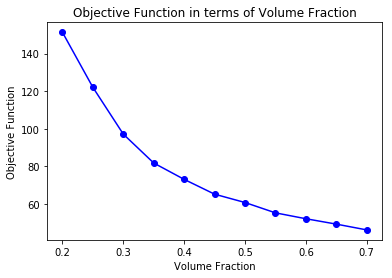

Plot Saved


In [33]:
fig=plt.figure()
plt.title('Objective Function in terms of Volume Fraction')
y_plot = [c20[it20-1],c25[it25-1],c30[it30-1],c35[it35-1],c40[it40-1],c45[it45-1],c50[it50-1],c55[it55-1],c60[it60-1],c65[it65-1],c70[it70-1]]
x_plot = [0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7]
plt.plot(x_plot,y_plot,'b', marker = 'o')
plt.xlabel('Volume Fraction')
plt.ylabel('Objective Function')
plt.show()
fig.savefig('Objective Function in terms of Volume Fraction ' + str(nelx) + ' x '+ str(nely) + ' - ' + str(BC) + ' - ' + str(method) + ' - ' + str(volume_fraction) + '.png')     
print("Plot Saved" )